# Without PCA LDA

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using original features
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.6314
Precision: 0.6801
Recall: 0.6314
F1-score: 0.5894

Logistic Regression:
Training Accuracy: 0.9953
Testing Accuracy: 0.8358
Precision: 0.8436
Recall: 0.8358
F1-score: 0.8298


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.4765
Testing Accuracy: 0.4343
Precision: 0.3624
Recall: 0.4343
F1-score: 0.3819

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.4489
Precision: 0.4574
Recall: 0.4489
F1-score: 0.4489

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.6460
Precision: 0.6366
Recall: 0.6460
F1-score: 0.6236

KNN:
Training Accuracy: 0.7273
Testing Accuracy: 0.5693
Precision: 0.6058
Recall: 0.5693
F1-score: 0.5512

SVM:
Training Accuracy: 0.9796
Testing Accuracy: 0.8285
Precision: 0.8610
Recall: 0.8285
F1-score: 0.8179

Naïve Bayes:
Training Accuracy: 0.5455
Testing Accuracy: 0.4891
Precision: 0.6646
Recall: 0.4891
F1-score: 0.4837

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.6241
Precision: 0.6232
Recall: 0.6241
F1-score: 0.5982


           Feature LD1  Scaling LD1         Feature LD2  Scaling LD2
0   Standard Deviation   -13.865993                Area   122.307534
1             contrast    13.616880          FilledArea  -118.630213
2        gabor_entropy   -12.277751         homogeneity    44.790360
3      Shannon_Entropy   -11.071633  Standard Deviation   -41.901841
4        dissimilarity   -10.245706            Skewness   -35.769698
5             Skewness    -8.233066     Shannon_Entropy    30.087292
6          homogeneity    -8.004836            contrast    20.996714
7               energy    -7.881039              energy   -20.321449
8         gabor_energy     6.730667            Kurtosis    18.439161
9                 Mean     6.301926       dissimilarity   -13.410538
10          brightness     6.301926       gabor_entropy    -8.933151
11                Area     5.552800          lbp_energy     8.501743
12          FilledArea    -4.590678                Mean     7.296339
13       EquivDiameter    -4.10328

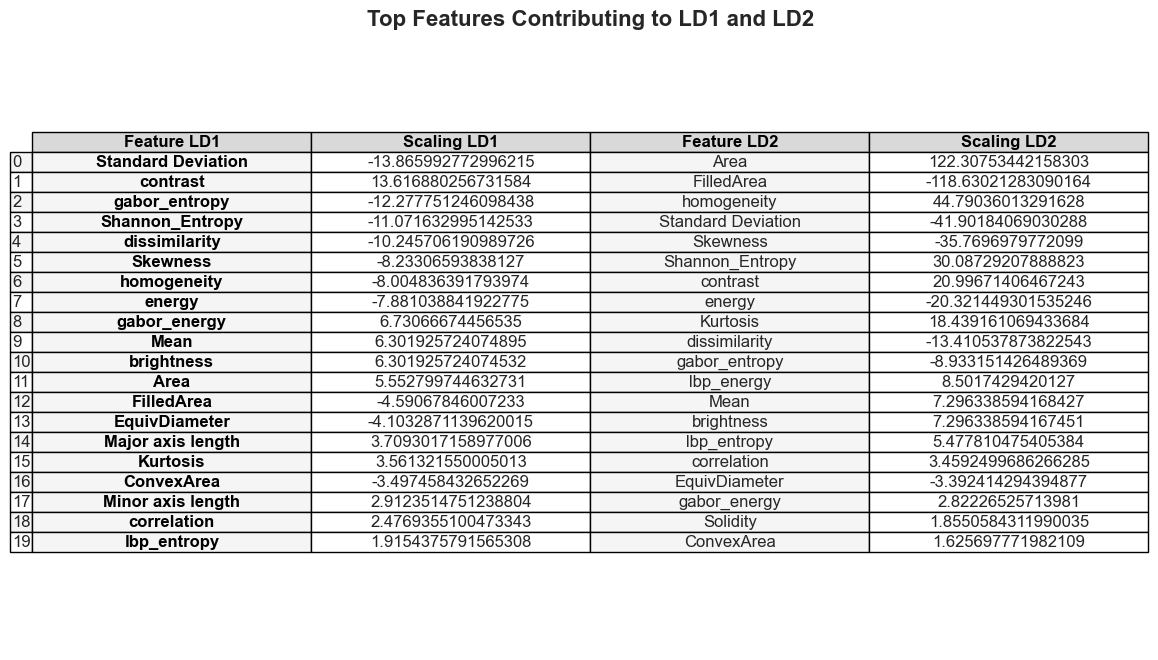

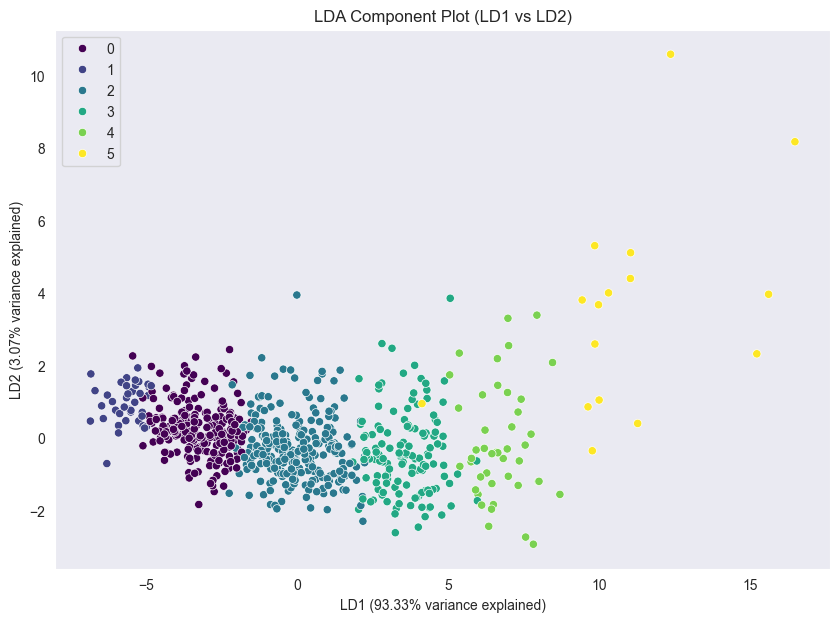


Top 20 important features according to Random Forest:
              Feature  Importance
71            NP3RIGN    0.022733
41            NP2HOBB    0.021652
38            NP2DRES    0.020917
51           NP3BRADY    0.020384
63           NP3POSTR    0.018956
1         Circularity    0.017963
13           Solidity    0.017806
82           NP3TTAPL    0.017331
39             NP2EAT    0.017151
22        homogeneity    0.016989
4              Extent    0.016972
23         lbp_energy    0.016423
20       gabor_energy    0.016422
11    Shannon_Entropy    0.016420
9   Minor axis length    0.016390
7   Major axis length    0.016180
44            NP2RISE    0.016120
58           NP3HMOVR    0.016085
2          ConvexArea    0.016059
17        correlation    0.016042


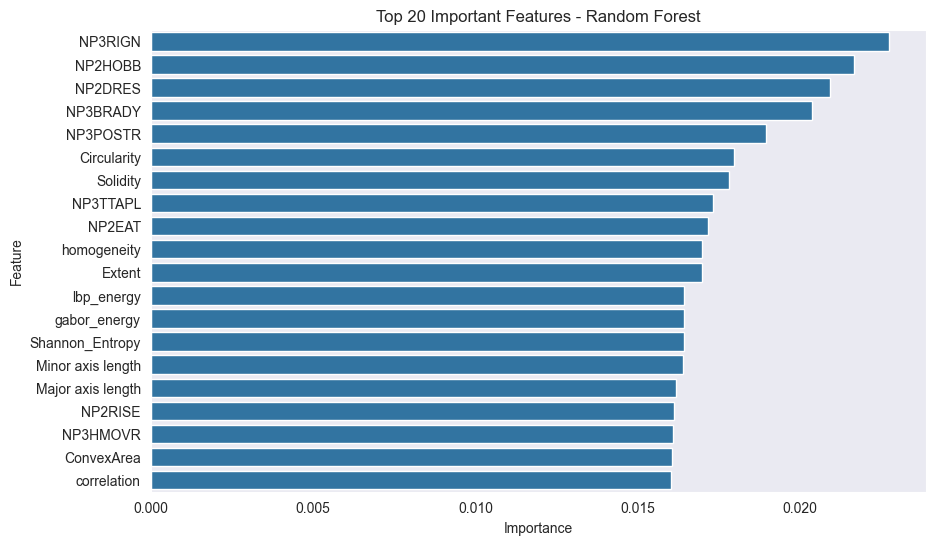


Top 20 selected features by RFE:
     Feature  Ranking
25   NP1ANXS        1
34   NP1PAIN        1
35   NP1SLPD        1
38   NP2DRES        1
39    NP2EAT        1
41   NP2HOBB        1
44   NP2RISE        1
46   NP2SPCH        1
50   NP2WALK        1
52  NP3FACXP        1
54  NP3FTAPL        1
55  NP3FTAPR        1
62  NP3LGAGR        1
63  NP3POSTR        1
64  NP3PRSPL        1
67  NP3PTRML        1
73  NP3RIGRU        1
74  NP3RISNG        1
80  NP3RTCON        1
82  NP3TTAPL        1


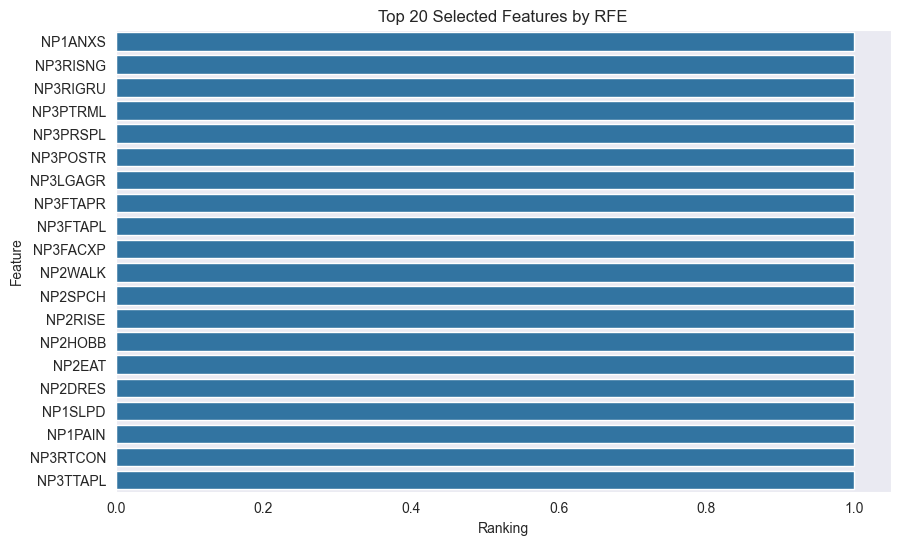

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, mutual_info_classif, chi2,SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already preprocessed and split into X_train, X_test, y_train, y_test

# Instantiate and fit the LDA model
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Get the explained variance ratios for each component
lda_variance_ratios = lda.explained_variance_ratio_

# Extract top 20 features for both LD1 and LD2
top_20_idx_ld1 = np.abs(lda.scalings_[:, 0]).argsort()[::-1][:20]
top_20_features_ld1 = X.columns[top_20_idx_ld1]
top_20_scalings_ld1 = lda.scalings_[top_20_idx_ld1, 0]

top_20_idx_ld2 = np.abs(lda.scalings_[:, 1]).argsort()[::-1][:20]
top_20_features_ld2 = X.columns[top_20_idx_ld2]
top_20_scalings_ld2 = lda.scalings_[top_20_idx_ld2, 1]

# Create a DataFrame to hold the top 20 features and their scalings for both LD1 and LD2
top_features_table = pd.DataFrame({
    'Feature LD1': top_20_features_ld1,
    'Scaling LD1': top_20_scalings_ld1,
    'Feature LD2': top_20_features_ld2,
    'Scaling LD2': top_20_scalings_ld2
})

# Display the table
print(top_features_table)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figsize as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = plt.table(cellText=top_features_table.values,
                  rowLabels=top_features_table.index,
                  colLabels=top_features_table.columns,
                  cellLoc='center',
                  loc='center')

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Styling the table
colors = ['#f5f5f5', '#ffffff']  # Alternating row colors
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:  # Header row
        cell.set_text_props(fontweight='bold', color='black')
        cell.set_facecolor('#d9d9d9')  # Header background color
    elif key[1] == 0:  # First column (index column)
        cell.set_text_props(fontweight='bold', color='black')
        cell.set_facecolor('#f5f5f5')  # Index column background color
    else:
        cell.set_facecolor(colors[i % 2])  # Alternating row colors

# Add border lines
for key in table.get_celld().keys():
    cell = table.get_celld()[key]
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

# Show the plot
plt.title('Top Features Contributing to LD1 and LD2', fontsize=16, weight='bold')
plt.show()


# Plot the LDA components (LD1 and LD2)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette="viridis")
plt.title("LDA Component Plot (LD1 vs LD2)")
plt.xlabel(f"LD1 ({lda_variance_ratios[0]*100:.2f}% variance explained)")
plt.ylabel(f"LD2 ({lda_variance_ratios[1]*100:.2f}% variance explained)")
plt.grid(visible=False)
plt.show()



### 1. Feature Importance using Random Forest ###
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 important features according to Random Forest:")
print(rf_feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Top 20 Important Features - Random Forest')
plt.grid(visible=False)
plt.show()


### 2. Recursive Feature Elimination (RFE) using Logistic Regression ###
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(logreg, n_features_to_select=20)
rfe.fit(X_train, y_train)

# Create a DataFrame with RFE feature rankings
rfe_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Select the top 20 features with rank 1
top_rfe_features = rfe_features_df[rfe_features_df['Ranking'] == 1]
print("\nTop 20 selected features by RFE:")
print(top_rfe_features)

# Plot the top RFE features
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=top_rfe_features.sort_values(by='Ranking'))
plt.title('Top 20 Selected Features by RFE')
plt.grid(visible=False)
plt.show()






Top 20 features by Fisher Score:
     Feature  Fisher Score
38   NP2DRES      0.629708
41   NP2HOBB      0.501223
44   NP2RISE      0.478093
39    NP2EAT      0.453559
49   NP2TURN      0.436872
51  NP3BRADY      0.411550
74  NP3RISNG      0.360180
40   NP2FREZ      0.359365
61  NP3LGAGL      0.346789
57  NP3HMOVL      0.344217
83  NP3TTAPR      0.334708
62  NP3LGAGR      0.330988
63  NP3POSTR      0.312778
82  NP3TTAPL      0.310422
52  NP3FACXP      0.310005
50   NP2WALK      0.307499
71   NP3RIGN      0.306699
46   NP2SPCH      0.293998
43   NP2HYGN      0.284937
81   NP3SPCH      0.279140


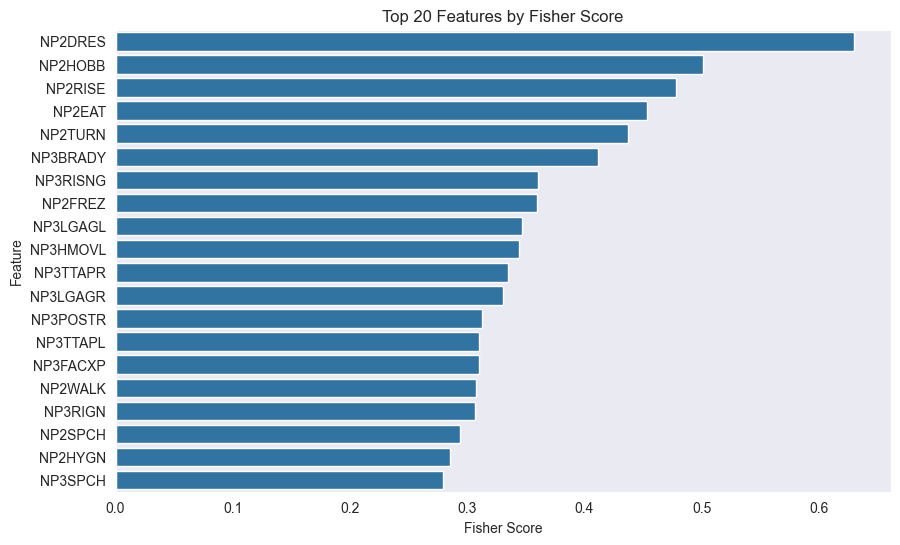


Top 20 features by Fisher Score:
     Feature  Fisher Score
38   NP2DRES     91.055782
41   NP2HOBB     72.476822
44   NP2RISE     69.132177
39    NP2EAT     65.584644
49   NP2TURN     63.171656
51  NP3BRADY     59.510191
74  NP3RISNG     52.082066
40   NP2FREZ     51.964166
61  NP3LGAGL     50.145631
57  NP3HMOVL     49.773799
83  NP3TTAPR     48.398839
62  NP3LGAGR     47.860934
63  NP3POSTR     45.227629
82  NP3TTAPL     44.887020
52  NP3FACXP     44.826667
50   NP2WALK     44.464353
71   NP3RIGN     44.348743
46   NP2SPCH     42.512177
43   NP2HYGN     41.201910
81   NP3SPCH     40.363715


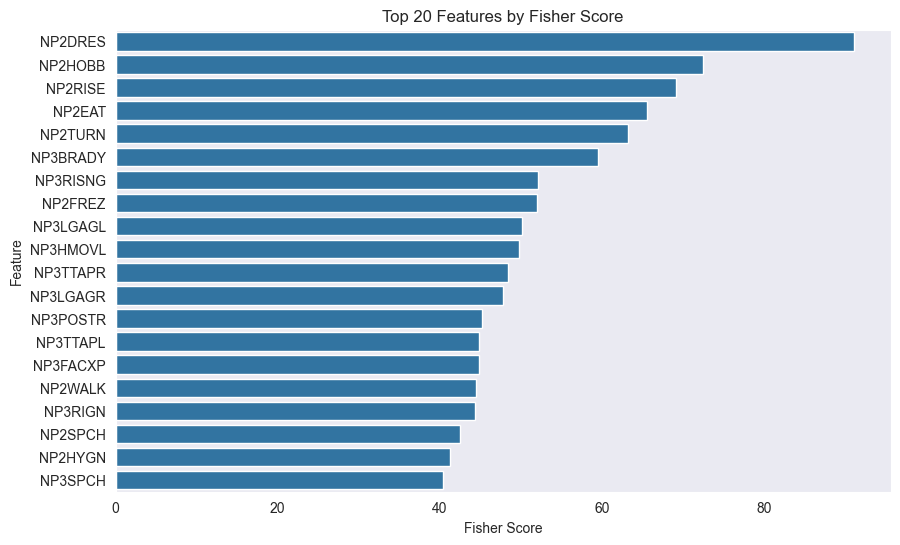


Top 20 features by Averaged Mutual Information Score:
     Feature  Mutual Information
38   NP2DRES            0.231616
41   NP2HOBB            0.187829
51  NP3BRADY            0.179000
39    NP2EAT            0.175590
44   NP2RISE            0.168929
49   NP2TURN            0.160379
57  NP3HMOVL            0.156790
82  NP3TTAPL            0.146214
83  NP3TTAPR            0.145447
52  NP3FACXP            0.138790
74  NP3RISNG            0.136145
62  NP3LGAGR            0.133030
71   NP3RIGN            0.132926
63  NP3POSTR            0.131061
61  NP3LGAGL            0.127866
50   NP2WALK            0.127193
54  NP3FTAPL            0.123925
81   NP3SPCH            0.121326
55  NP3FTAPR            0.114135
46   NP2SPCH            0.112538


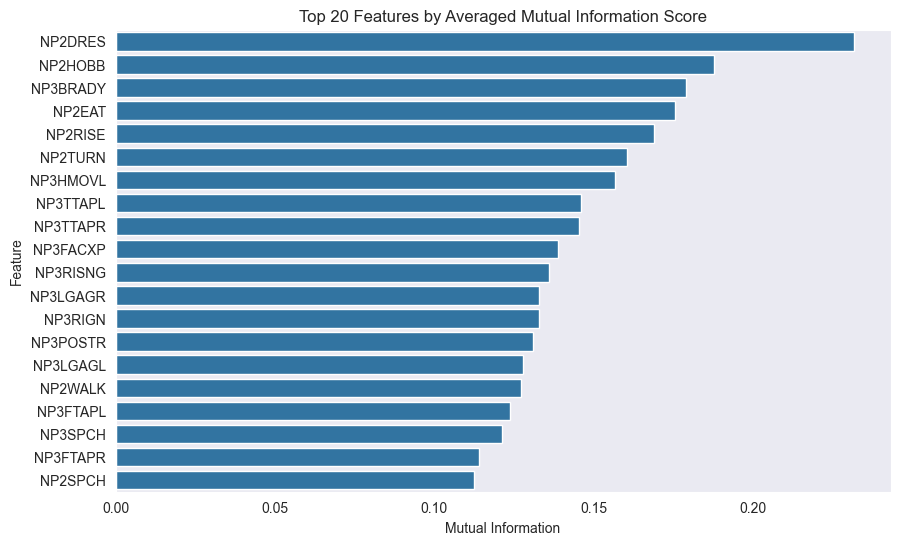

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif


# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features].values
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fisher Score function
def fisher_score(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    scores = np.zeros(n_features)
    
    for i in range(n_features):
        numerator = 0.0
        denominator = 0.0
        overall_mean = np.mean(X[:, i])
        
        for c in classes:
            X_c = X[y == c, i]
            mean_c = np.mean(X_c)
            var_c = np.var(X_c)
            numerator += len(X_c) * (mean_c - overall_mean) ** 2
            denominator += len(X_c) * var_c
        
        if denominator != 0:
            scores[i] = numerator / denominator
        else:
            scores[i] = 0
    return scores



### 4. Fisher Score ###
fisher_scores = fisher_score(X_train, y_train)

# Create a DataFrame to store feature names and their Fisher scores
fisher_score_df = pd.DataFrame({
    'Feature': data[numerical_features + categorical_features].columns,
    'Fisher Score': fisher_scores
}).sort_values(by='Fisher Score', ascending=False).head(20)

print("\nTop 20 features by Fisher Score:")
print(fisher_score_df)

# Plot the Fisher scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Fisher Score', y='Feature', data=fisher_score_df)
plt.title('Top 20 Features by Fisher Score')
plt.grid(visible=False)
plt.show()
### 4. Fisher Score using f_classif ###

fisher_scores, p_values = f_classif(X_train, y_train)

# Create a DataFrame to store feature names and their Fisher scores
fisher_score_df = pd.DataFrame({
    'Feature': numerical_features + categorical_features,
    'Fisher Score': fisher_scores
}).sort_values(by='Fisher Score', ascending=False).head(20)

print("\nTop 20 features by Fisher Score:")
print(fisher_score_df)

# Plot the Fisher scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Fisher Score', y='Feature', data=fisher_score_df)
plt.title('Top 20 Features by Fisher Score')
plt.grid(visible=False)
plt.show()



# Stabilize Mutual Information by averaging over multiple runs
def averaged_mutual_info(X, y, num_runs=10, n_neighbors=5):
    mi_scores_avg = np.zeros(X.shape[1])
    
    for i in range(num_runs):
        mi_scores = mutual_info_classif(X, y, n_neighbors=n_neighbors, random_state=i)
        mi_scores_avg += mi_scores

    return mi_scores_avg / num_runs

# Compute mutual information scores
mi_scores_avg = averaged_mutual_info(X_train, y_train, num_runs=10, n_neighbors=5)

# Create a DataFrame to store feature names and their averaged mutual information scores
mi_score_df = pd.DataFrame({
    'Feature': numerical_features + categorical_features,
    'Mutual Information': mi_scores_avg
}).sort_values(by='Mutual Information', ascending=False).head(20)

# Display the top 20 features
print("\nTop 20 features by Averaged Mutual Information Score:")
print(mi_score_df)

# Plot the top 20 features by averaged mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_score_df)
plt.title('Top 20 Features by Averaged Mutual Information Score')
plt.grid(visible=False)
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_components = 2 # min(X.shape[1], len(np.unique(y)) - 1)  # Ensure n_components is within valid range
print(n_components)
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train)
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_precision:.4f}")
    print(f"Testing Recall: {test_recall:.4f}")
    print(f"Testing F1-score: {test_f1:.4f}")




2

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.9180
Testing Precision: 0.9210
Testing Recall: 0.9180
Testing F1-score: 0.9181

Logistic Regression:
Training Accuracy: 0.9588
Testing Accuracy: 0.9016
Testing Precision: 0.9034
Testing Recall: 0.9016
Testing F1-score: 0.9015


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost:
Training Accuracy: 0.8971
Testing Accuracy: 0.8197
Testing Precision: 0.7615
Testing Recall: 0.8197
Testing F1-score: 0.7829

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8962
Testing Precision: 0.9006
Testing Recall: 0.8962
Testing F1-score: 0.8961

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.9016
Testing Precision: 0.9056
Testing Recall: 0.9016
Testing F1-score: 0.9016

KNN:
Training Accuracy: 0.9643
Testing Accuracy: 0.9180
Testing Precision: 0.9194
Testing Recall: 0.9180
Testing F1-score: 0.9177

SVM:
Training Accuracy: 0.9643
Testing Accuracy: 0.9016
Testing Precision: 0.9060
Testing Recall: 0.9016
Testing F1-score: 0.9012

Naïve Bayes:
Training Accuracy: 0.9561
Testing Accuracy: 0.9071
Testing Precision: 0.9136
Testing Recall: 0.9071
Testing F1-score: 0.9076

XGB:
Training Accuracy: 0.9986
Testing Accuracy: 0.9071
Testing Precision: 0.9099
Testing Recall: 0.9071
Testing F1-score: 0.9068


In [5]:
# Print top 20 features for each LDA component
print("Top 20 features for each LDA component:")
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:20]
    top_20_features = X.columns[top_20_idx]
    print(f"Component {i+1}: {top_20_features.tolist()}")

# Example of printing the length of union of top 20 features
union_features = set()
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:20]
    top_20_features = X.columns[top_20_idx]
    union_features.update(top_20_features.tolist())
print("\nUnion of top 20 features for each LDA component:")
print(union_features)
print(f"\nLength of union of top 20 features across all components: {len(union_features)}")

Top 20 features for each LDA component:
Component 1: ['Standard Deviation', 'contrast', 'gabor_entropy', 'Shannon_Entropy', 'dissimilarity', 'Skewness', 'homogeneity', 'energy', 'gabor_energy', 'Mean', 'brightness', 'Area', 'FilledArea', 'EquivDiameter', 'Major axis length', 'Kurtosis', 'ConvexArea', 'Minor axis length', 'correlation', 'lbp_entropy']
Component 2: ['Area', 'FilledArea', 'homogeneity', 'Standard Deviation', 'Skewness', 'Shannon_Entropy', 'contrast', 'energy', 'Kurtosis', 'dissimilarity', 'gabor_entropy', 'lbp_energy', 'Mean', 'brightness', 'lbp_entropy', 'correlation', 'EquivDiameter', 'gabor_energy', 'Solidity', 'ConvexArea']

Union of top 20 features for each LDA component:
{'Skewness', 'Major axis length', 'EquivDiameter', 'FilledArea', 'Kurtosis', 'gabor_energy', 'Minor axis length', 'brightness', 'gabor_entropy', 'Standard Deviation', 'Area', 'lbp_energy', 'contrast', 'homogeneity', 'lbp_entropy', 'correlation', 'Mean', 'Shannon_Entropy', 'Solidity', 'energy', 'Conv

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of LDA components to the number of classes minus one
n_components =2#len(np.unique(y_train)) - 1  # Set based on number of classes

# Initialize and fit the LDA model
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)

# Get the absolute values of the scalings (coefficients)
lda_scalings = np.abs(lda.scalings_)

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame(lda_scalings, index=X.columns, columns=[f'LD{i+1}' for i in range(n_components)])

# Sort the features by their contribution for each LD component
for i in range(n_components):
    top_features = feature_importance[f'LD{i+1}'].sort_values(ascending=False).head(20)
    print(f"Top 20 features contributing to LD{i+1}:")
    print(top_features)

# Extract top 20 features for both LD1 and LD2
top_features_ld1 = feature_importance['LD1'].sort_values(ascending=False).head(20)
top_features_ld2 = feature_importance['LD2'].sort_values(ascending=False).head(20)

# Combine both top feature sets into a single DataFrame for plotting
top_features_combined = pd.DataFrame({
    'LD1': top_features_ld1,
    'LD2': top_features_ld2
})

# Plot both LD1 and LD2 features side by side in a single table
plt.figure(figsize=(12, 8))
top_features_combined.plot(kind='barh', figsize=(10, 7))
plt.title('Top 20 Features Contributing to LD1 and LD2')
plt.xlabel('Feature Importance (Absolute Scaling Coefficients)')
plt.ylabel('Features')
plt.legend(['LD1', 'LD2'], loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [6]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label to Encoded Value Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label to Encoded Value Mapping:
Mild: 0
Minimal: 1
Moderate: 2
Moderate to Severe: 3
Severe: 4
Very Severe: 5


In [7]:
 # 1. Explained Variance
explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of each linear discriminant:\n", explained_variance)

Explained variance ratio of each linear discriminant:
 [0.93330932 0.03070653]


Cumulative explained variance:
 [0.93330932 0.96401585]


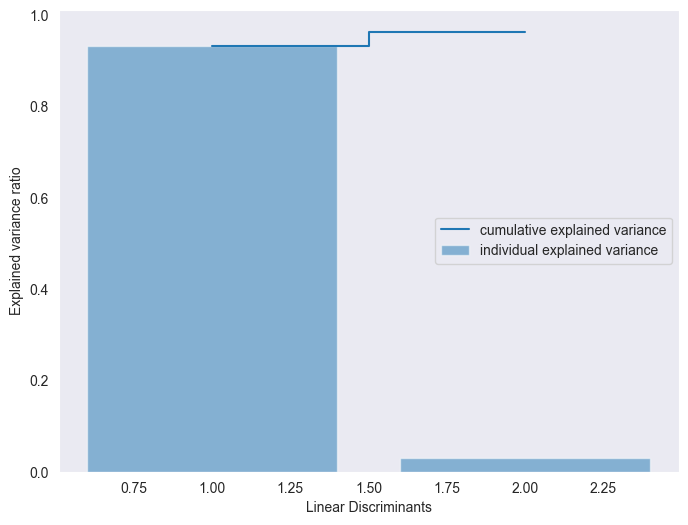

In [8]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.grid(visible=False)
plt.show()

In [9]:
# 3. Principal Component Scores
print("Linear Discriminant Scores (first 5 samples):\n", X_train_lda[:5])

Linear Discriminant Scores (first 5 samples):
 [[ 2.27322244 -0.34805249]
 [-1.51084256  0.69017894]
 [ 4.29676233  1.32619252]
 [-2.51567788 -0.02039016]
 [ 3.90949395 -0.56996415]]


In [10]:
# 4. Loading Scores
loading_scores = pd.DataFrame(lda.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
print("\nLoading scores (contributions of each feature to the linear discriminants):")
print(loading_scores)


Loading scores (contributions of each feature to the linear discriminants):
                    LD1         LD2        LD3        LD4        LD5
Area           5.552800  122.307534  82.856004  36.890686  73.488677
Circularity    0.149310   -0.714449  -0.388338   2.904568  -0.479483
ConvexArea    -3.497458    1.625698  -2.260331  -2.332096   4.720731
EquivDiameter -4.103287   -3.392414 -11.903393   3.787171  -1.384076
Extent        -0.012196   -0.953016   1.083679   0.474720   1.400801
...                 ...         ...        ...        ...        ...
NP3RTARU       0.167243    0.117371  -0.125011   0.189041   0.126727
NP3RTCON       0.272751    0.034076   0.040859  -0.402557  -0.031374
NP3SPCH        0.226463    0.058686  -0.119851  -0.002081  -0.119459
NP3TTAPL       0.289144    0.034390   0.503667   0.103805  -0.116830
NP3TTAPR       0.165991   -0.095716  -0.021327  -0.022284   0.287085

[84 rows x 5 columns]


In [11]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first linear discriminant:")
correlations = loading_scores['LD1']
print(correlations)


Correlation of each feature with the first linear discriminant:
Area             5.552800
Circularity      0.149310
ConvexArea      -3.497458
EquivDiameter   -4.103287
Extent          -0.012196
                   ...   
NP3RTARU         0.167243
NP3RTCON         0.272751
NP3SPCH          0.226463
NP3TTAPL         0.289144
NP3TTAPR         0.165991
Name: LD1, Length: 84, dtype: float64


In [12]:
correlations

Area             5.552800
Circularity      0.149310
ConvexArea      -3.497458
EquivDiameter   -4.103287
Extent          -0.012196
                   ...   
NP3RTARU         0.167243
NP3RTCON         0.272751
NP3SPCH          0.226463
NP3TTAPL         0.289144
NP3TTAPR         0.165991
Name: LD1, Length: 84, dtype: float64

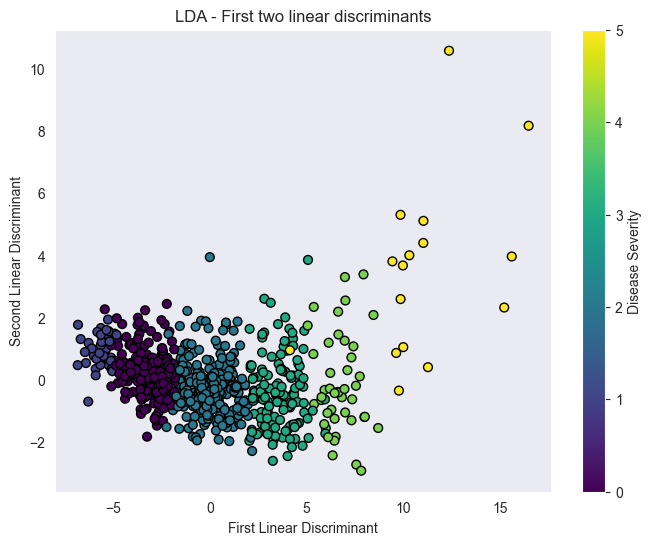

In [13]:
# 6. Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA - First two linear discriminants')
plt.colorbar(label='Disease Severity')
plt.grid(visible=False)
plt.show()


In [14]:


# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 2


In [15]:
# 8. Feature Importance
most_valuable_features = [np.abs(lda.scalings_[:, i]).argmax() for i in range(lda.scalings_.shape[1])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each linear discriminant:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1}: {feature}")


Most valuable features for each linear discriminant:
Linear Discriminant 1: Standard Deviation
Linear Discriminant 2: Area
Linear Discriminant 3: Shannon_Entropy
Linear Discriminant 4: Shannon_Entropy
Linear Discriminant 5: Skewness



Correlation matrix of linear discriminants:
 [[ 1.00000000e+00 -3.87617233e-15]
 [-3.87617233e-15  1.00000000e+00]]


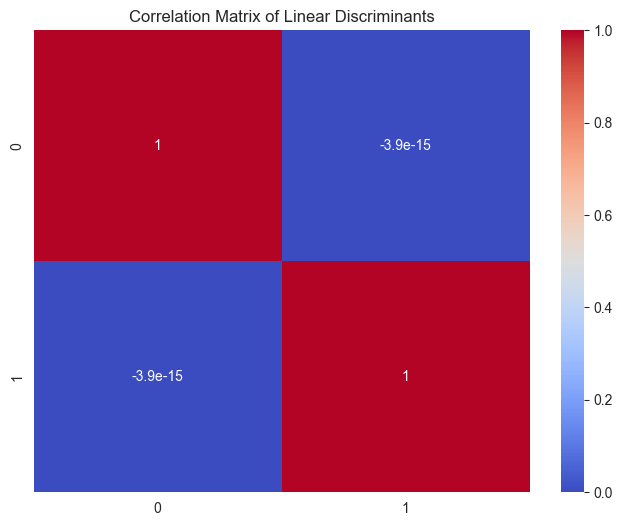

In [16]:
# 9. Multicollinearity
# LDA components are linear combinations, but we can check correlation among them
correlation_matrix = np.corrcoef(X_train_lda.T)
print("\nCorrelation matrix of linear discriminants:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Linear Discriminants')
plt.show()


In [17]:

# 10. Interpretation
# Interpretation often requires domain knowledge. The features contributing the most to each linear discriminant are the most important.
# These features can help in understanding the separation between classes.
print("\nInterpreting Linear Discriminants:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1} is largely influenced by {feature}.")


Interpreting Linear Discriminants:
Linear Discriminant 1 is largely influenced by Standard Deviation.
Linear Discriminant 2 is largely influenced by Area.
Linear Discriminant 3 is largely influenced by Shannon_Entropy.
Linear Discriminant 4 is largely influenced by Shannon_Entropy.
Linear Discriminant 5 is largely influenced by Skewness.


Agglomerative Clustering Silhouette Score: 0.3606
K-Means Clustering Silhouette Score: 0.3661
Agglomerative Clustering ARI: 0.8751
K-Means Clustering ARI: 0.8909
Agglomerative Clustering NMI: 0.8625
K-Means Clustering NMI: 0.8770


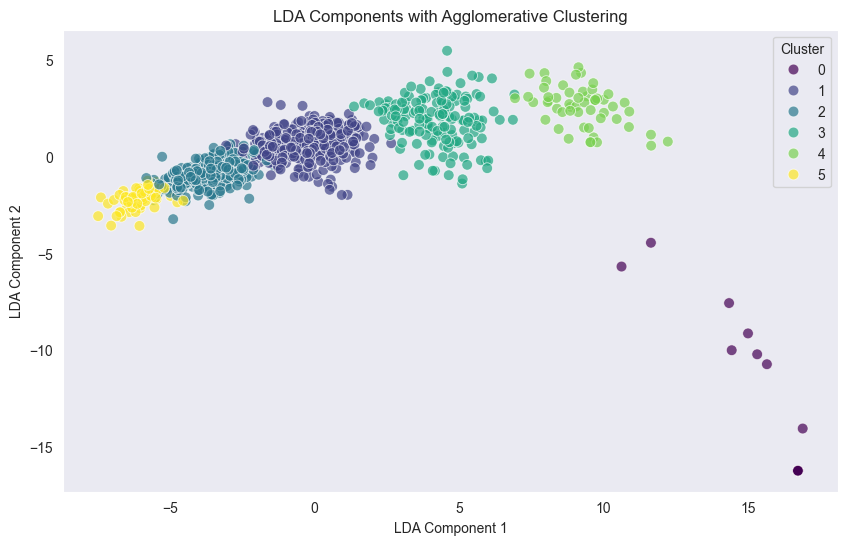

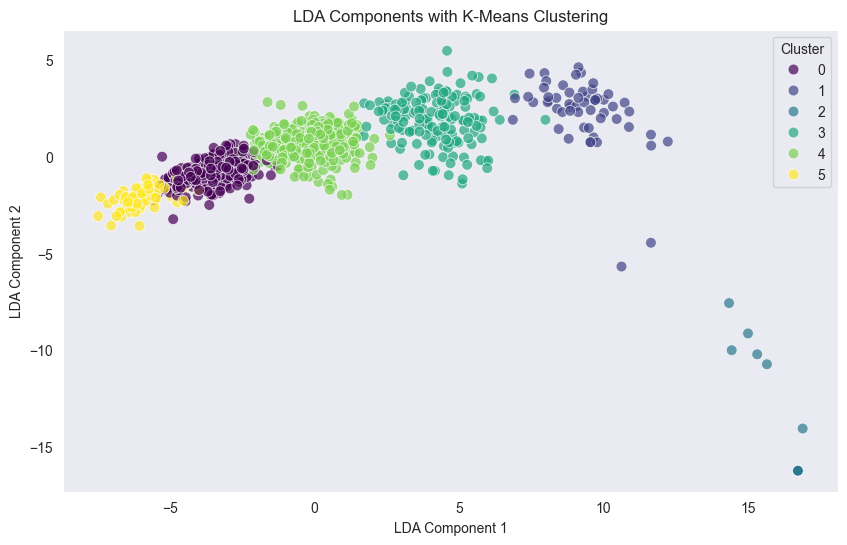

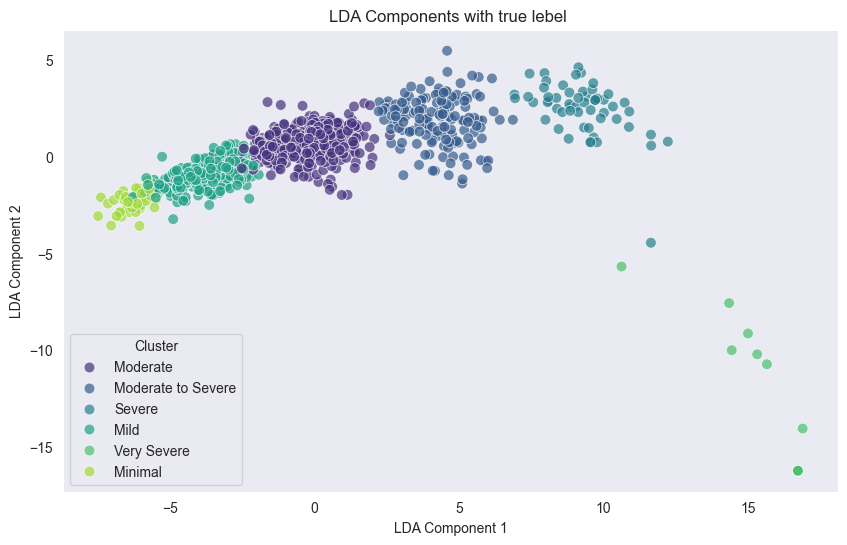

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Step 1: Store original numerical data before scaling
original_data = data[numerical_features].copy()

# Step 2: Apply MinMax scaling to the data (for later use)
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_features)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Apply LDA for Dimensionality Reduction
lda = LDA(n_components=5)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)
n_clusters = len(np.unique(y))
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(X_lda)

# Perform K-Means Clustering

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_lda)

# Evaluate Clustering Results
agg_silhouette_avg = silhouette_score(X_lda, agg_clusters)
kmeans_silhouette_avg = silhouette_score(X_lda, kmeans_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_avg:.4f}')
print(f'K-Means Clustering Silhouette Score: {kmeans_silhouette_avg:.4f}')

# Calculate ARI and NMI
agg_ari = adjusted_rand_score(y, agg_clusters)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
agg_nmi = normalized_mutual_info_score(y, agg_clusters)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_clusters)

print(f'Agglomerative Clustering ARI: {agg_ari:.4f}')
print(f'K-Means Clustering ARI: {kmeans_ari:.4f}')
print(f'Agglomerative Clustering NMI: {agg_nmi:.4f}')
print(f'K-Means Clustering NMI: {kmeans_nmi:.4f}')

# Visualization Function
def plot_clustering_results(X_lda, clusters, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.7)
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.grid(visible=False)
    plt.legend(title='Cluster')
    plt.show()

# Visualize LDA results with Agglomerative Clustering
plot_clustering_results(X_lda, agg_clusters, 'LDA Components with Agglomerative Clustering')

# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, kmeans_clusters, 'LDA Components with K-Means Clustering')
# Visualize LDA results with Agglomerative Clustering
y_original = le.inverse_transform(y)
# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, y_original, 'LDA Components with true lebel ')


Random Forest Pairwise p-values across visits:
                      V1_V2     V1_V3         V1_V4     V2_V3     V2_V4  \
NP3RIGN            0.110216  0.005580  1.086034e-04  0.209638  0.017387   
NP2HOBB            0.030833  0.007513  5.886831e-08  0.628853  0.000930   
NP2DRES            0.003962  0.001748  2.455721e-10  0.774858  0.000185   
NP3BRADY           0.243993  0.040008  2.594959e-03  0.388167  0.079194   
NP3POSTR           0.019759  0.006927  1.411986e-05  0.710778  0.032704   
Circularity        0.952214  0.130713  2.338408e-02  0.142469  0.025901   
Solidity           0.841220  0.357620  1.846784e-01  0.486505  0.266357   
NP3TTAPL           0.201501  0.108526  6.293131e-07  0.786984  0.000191   
NP2EAT             0.004955  0.000718  1.391559e-09  0.456453  0.000519   
homogeneity        0.500780  0.409898  1.010292e-01  0.821054  0.224337   
Extent             0.653066  0.203433  7.550980e-01  0.450128  0.899065   
lbp_energy         0.209744  0.084406  3.375478e-02  

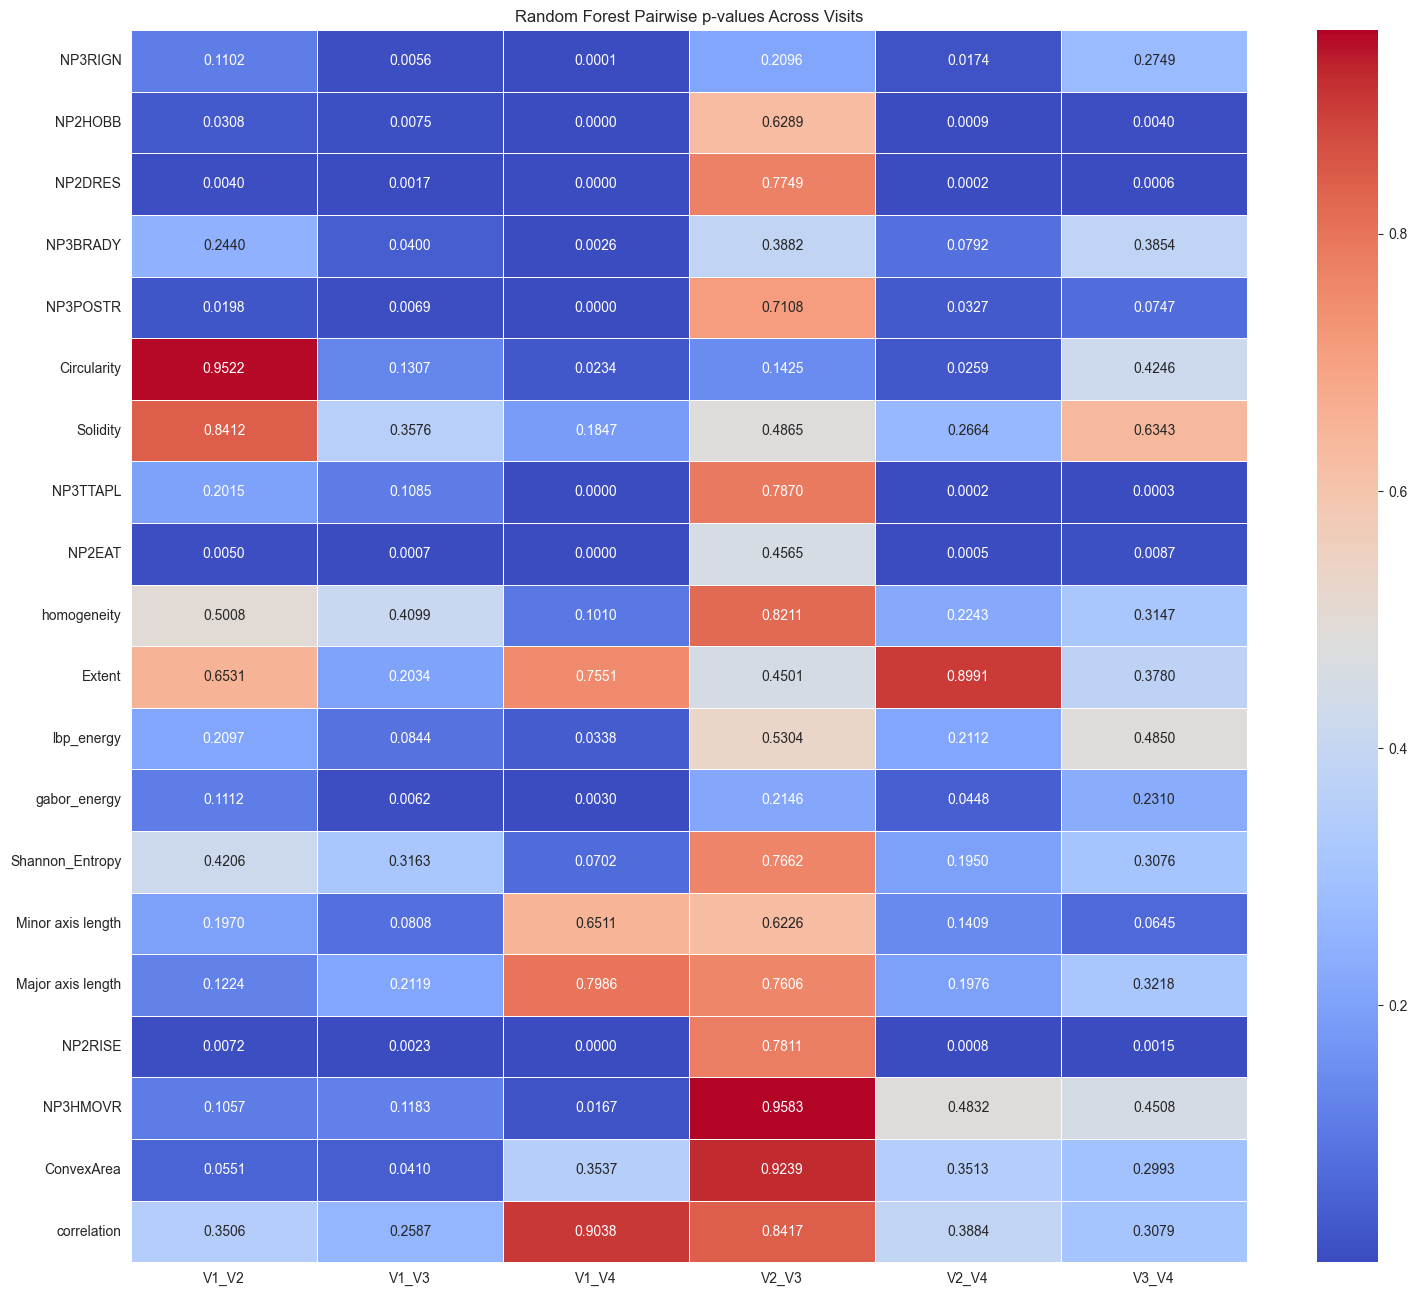

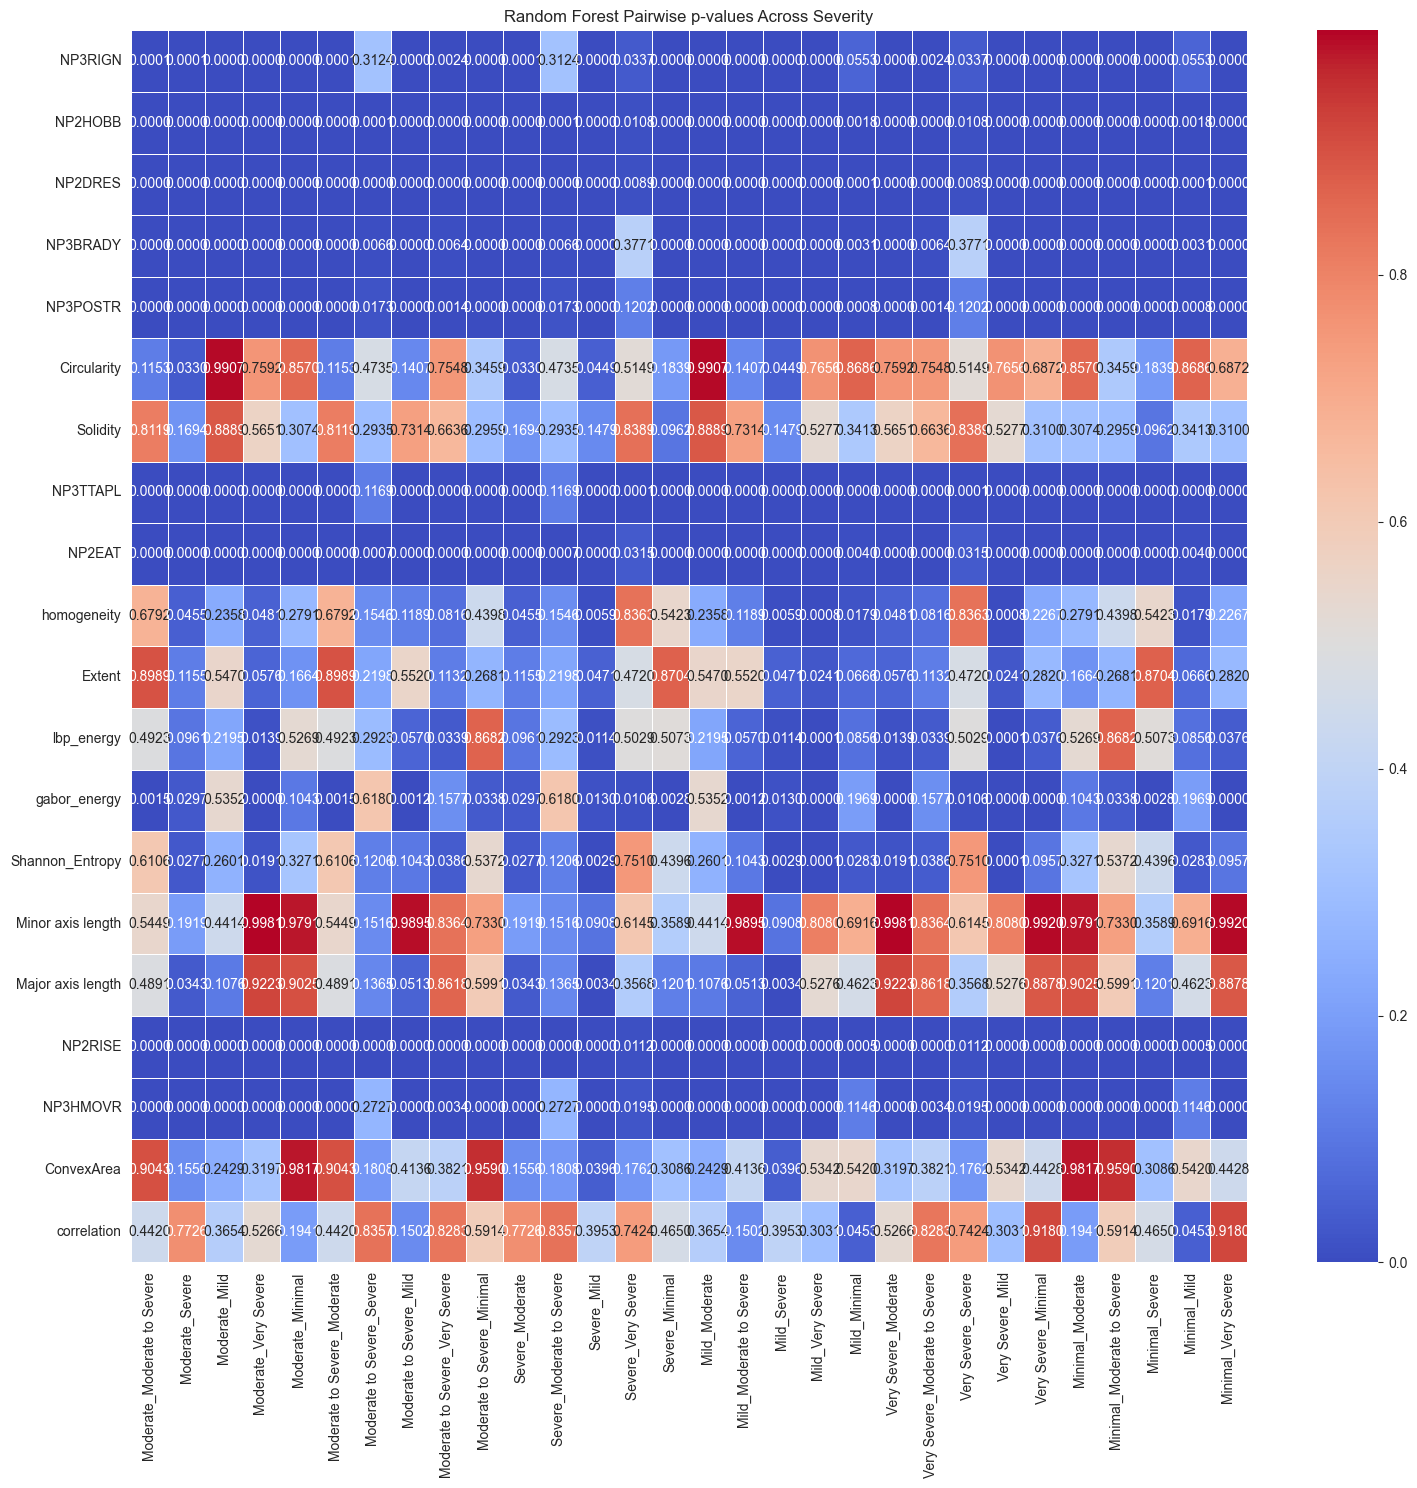

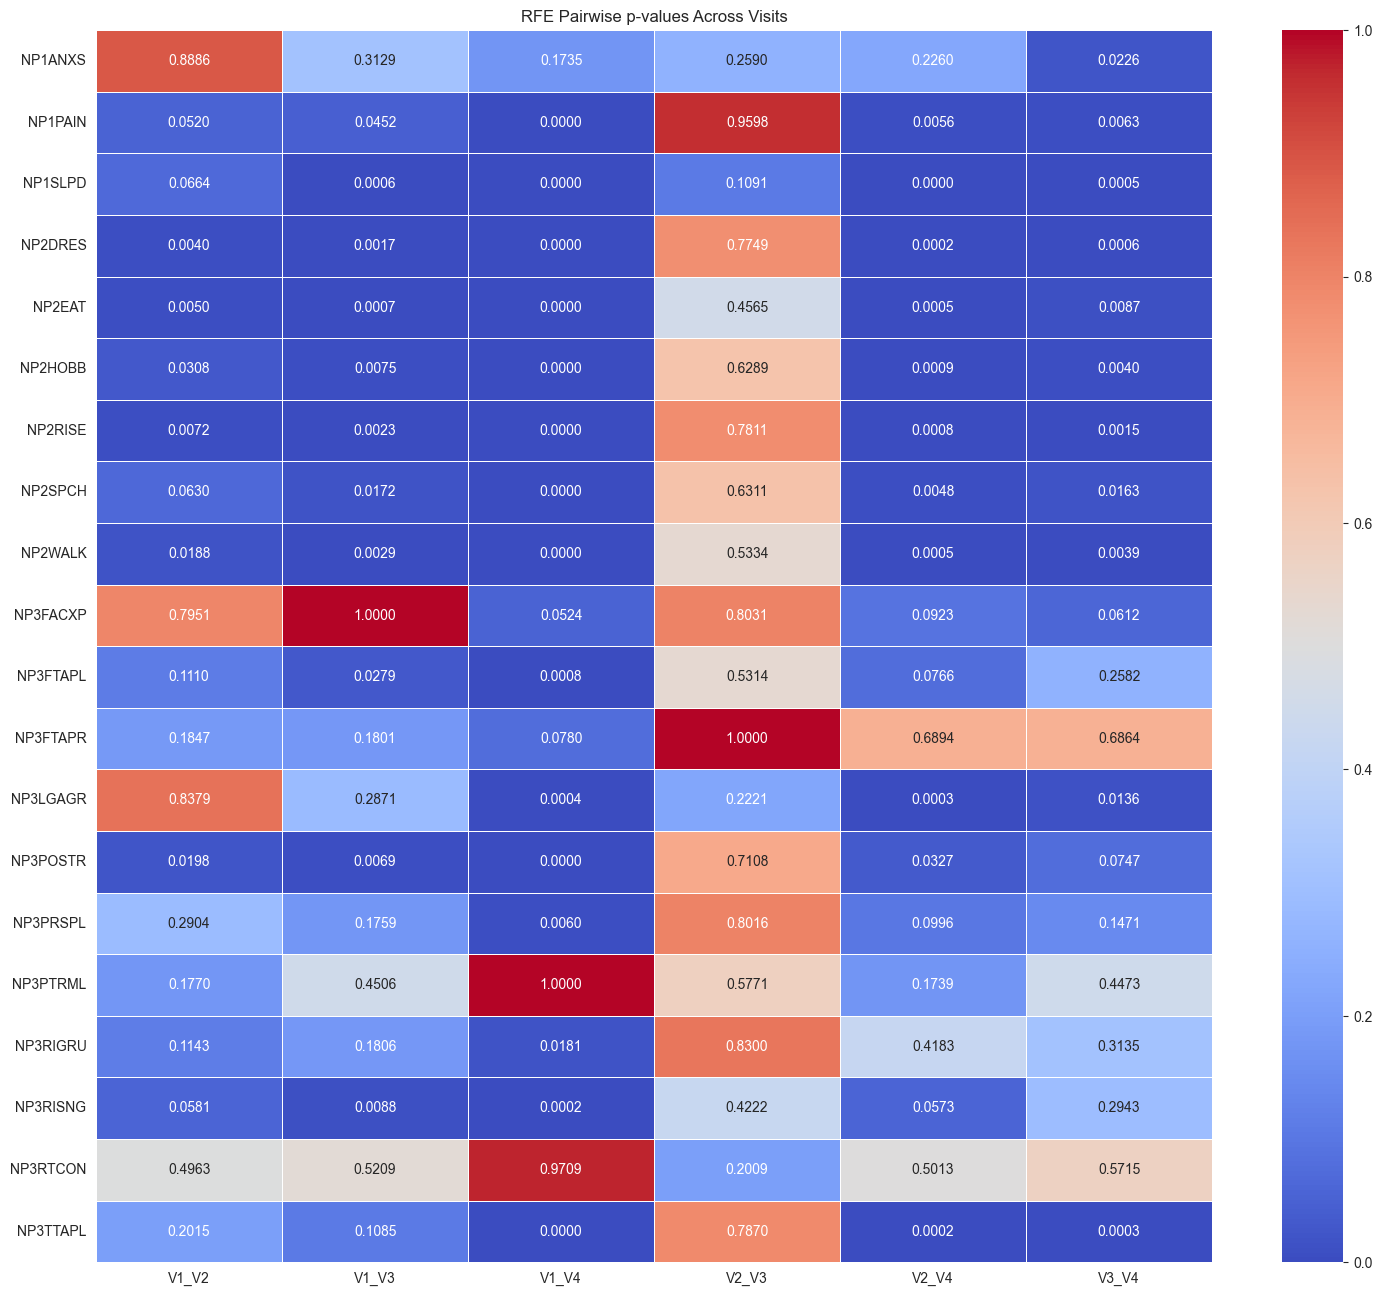

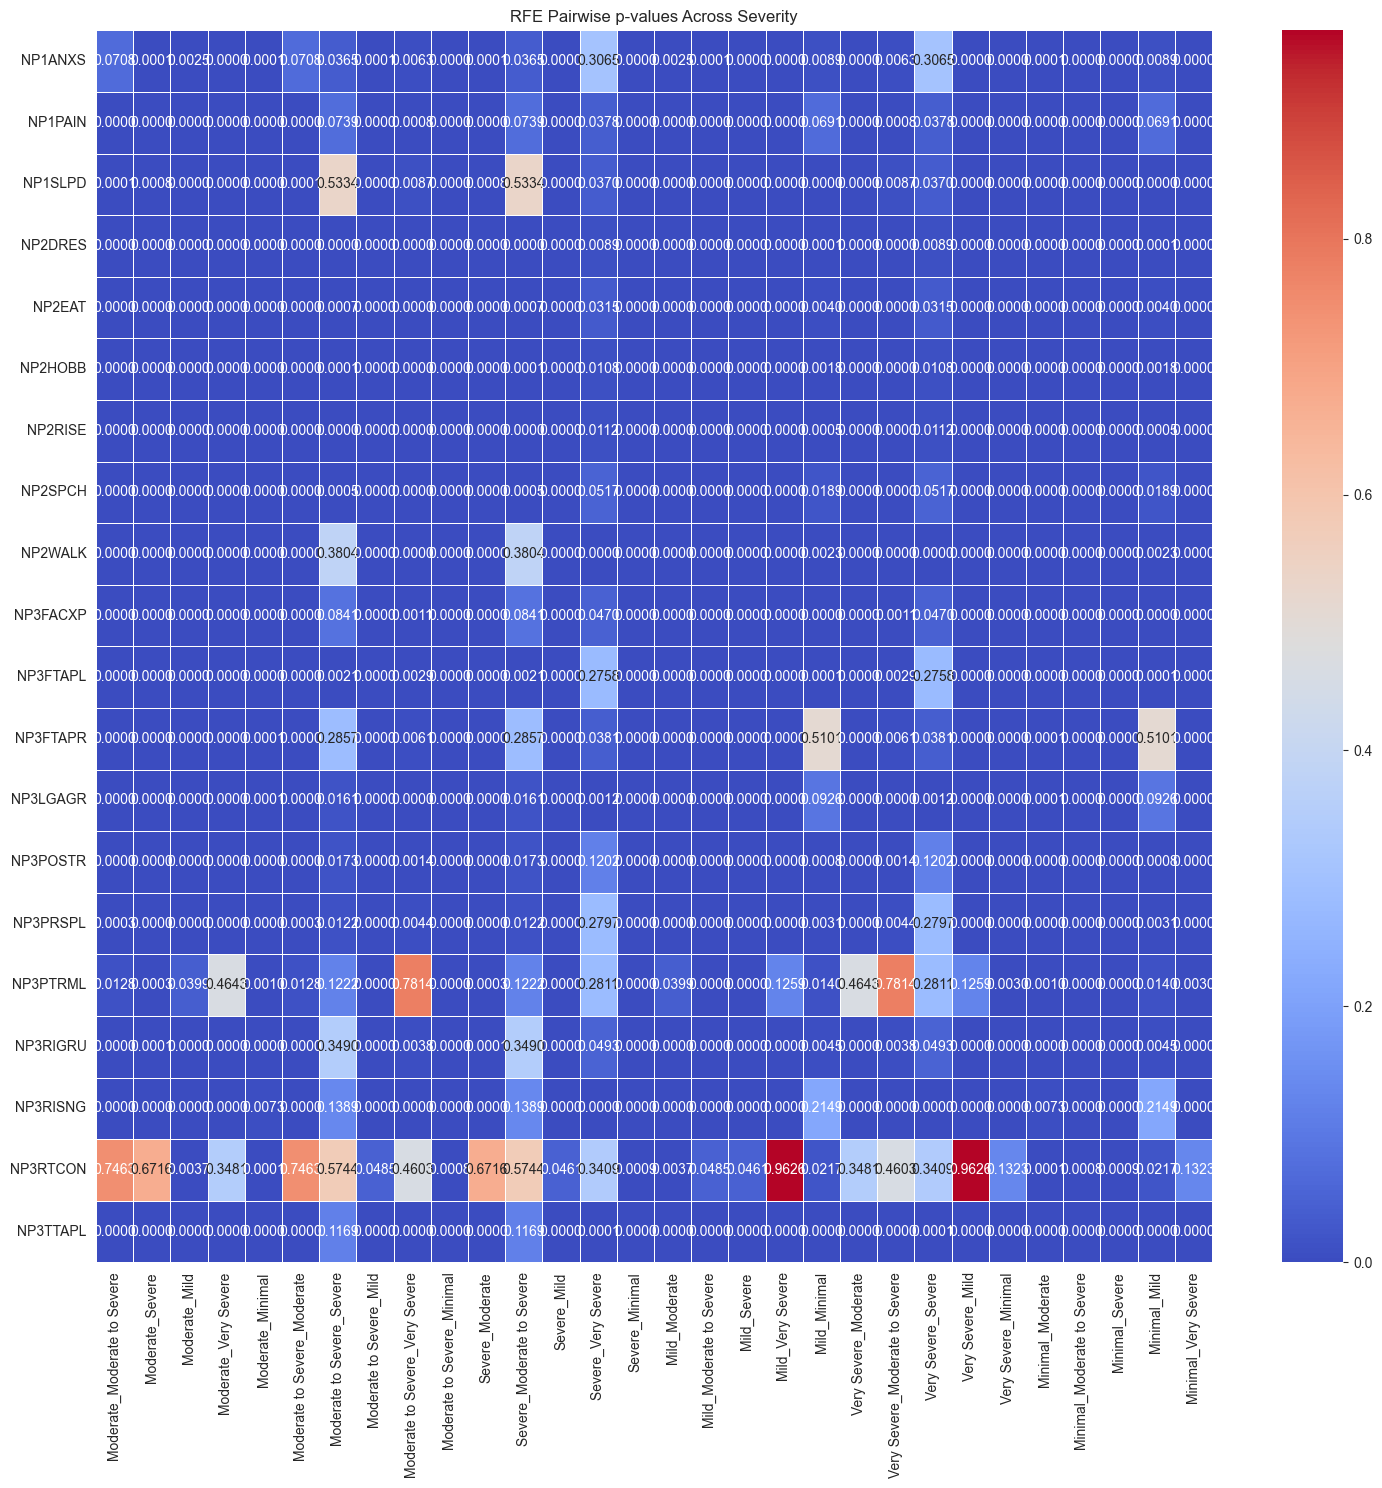

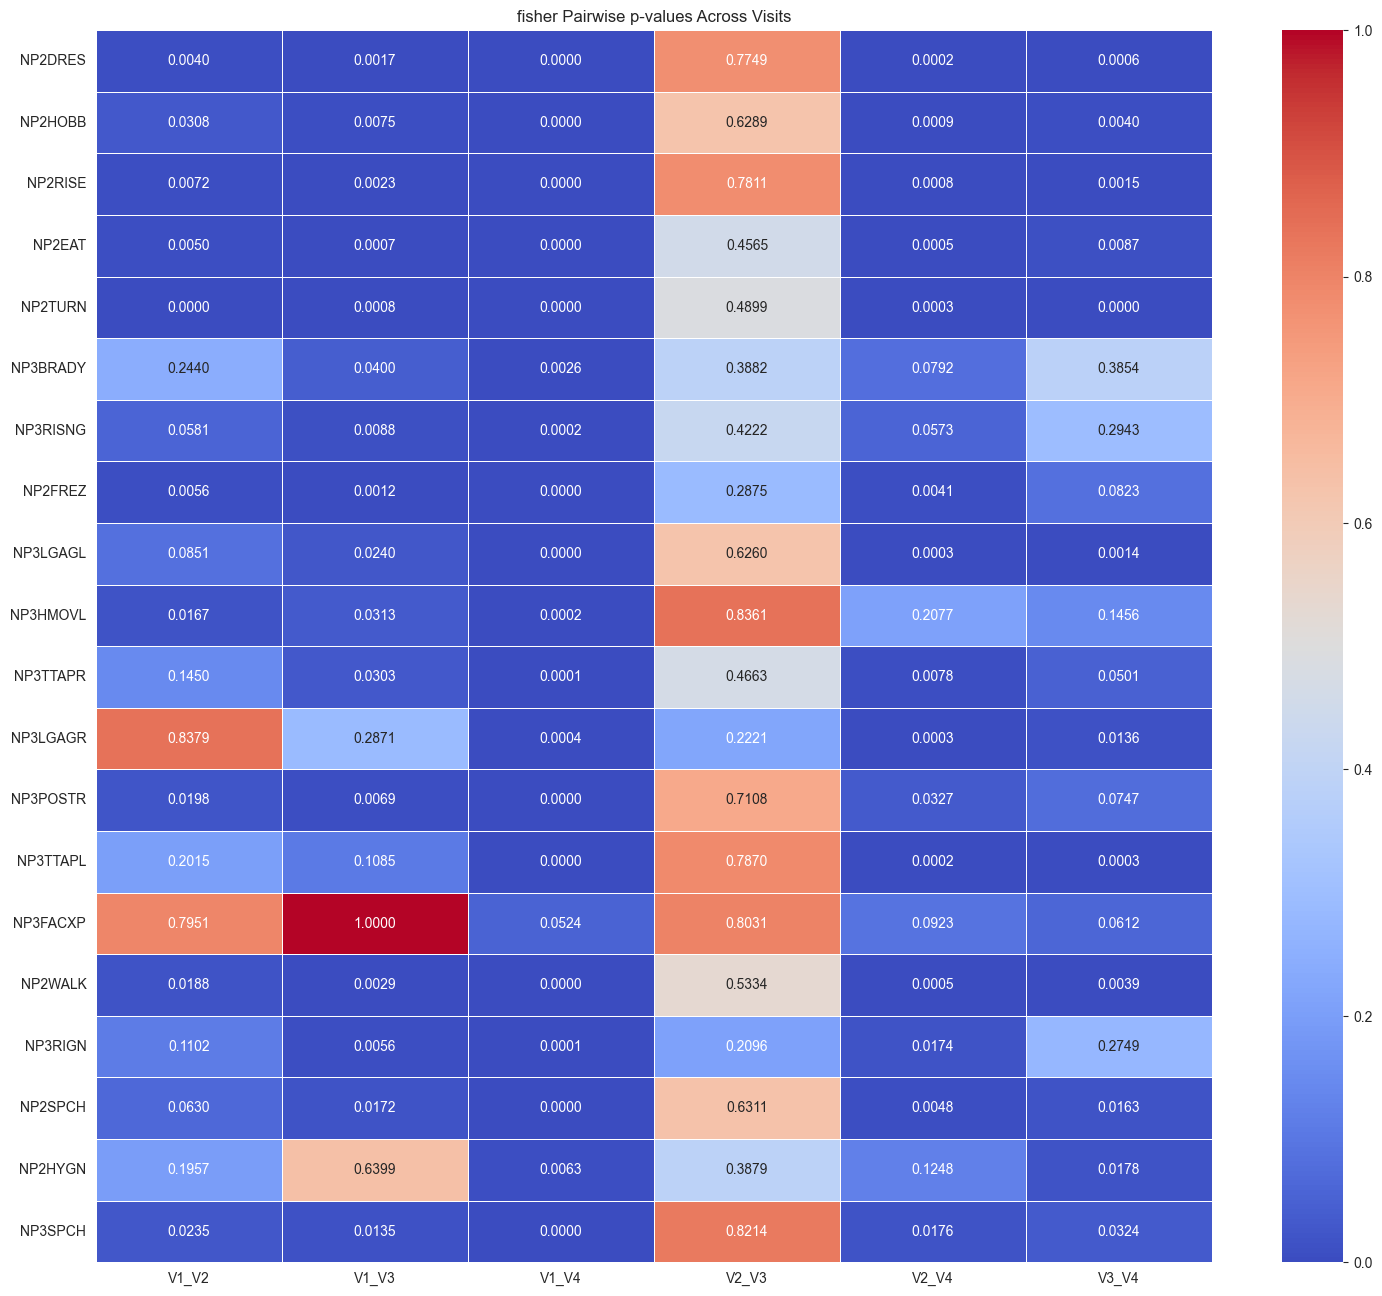

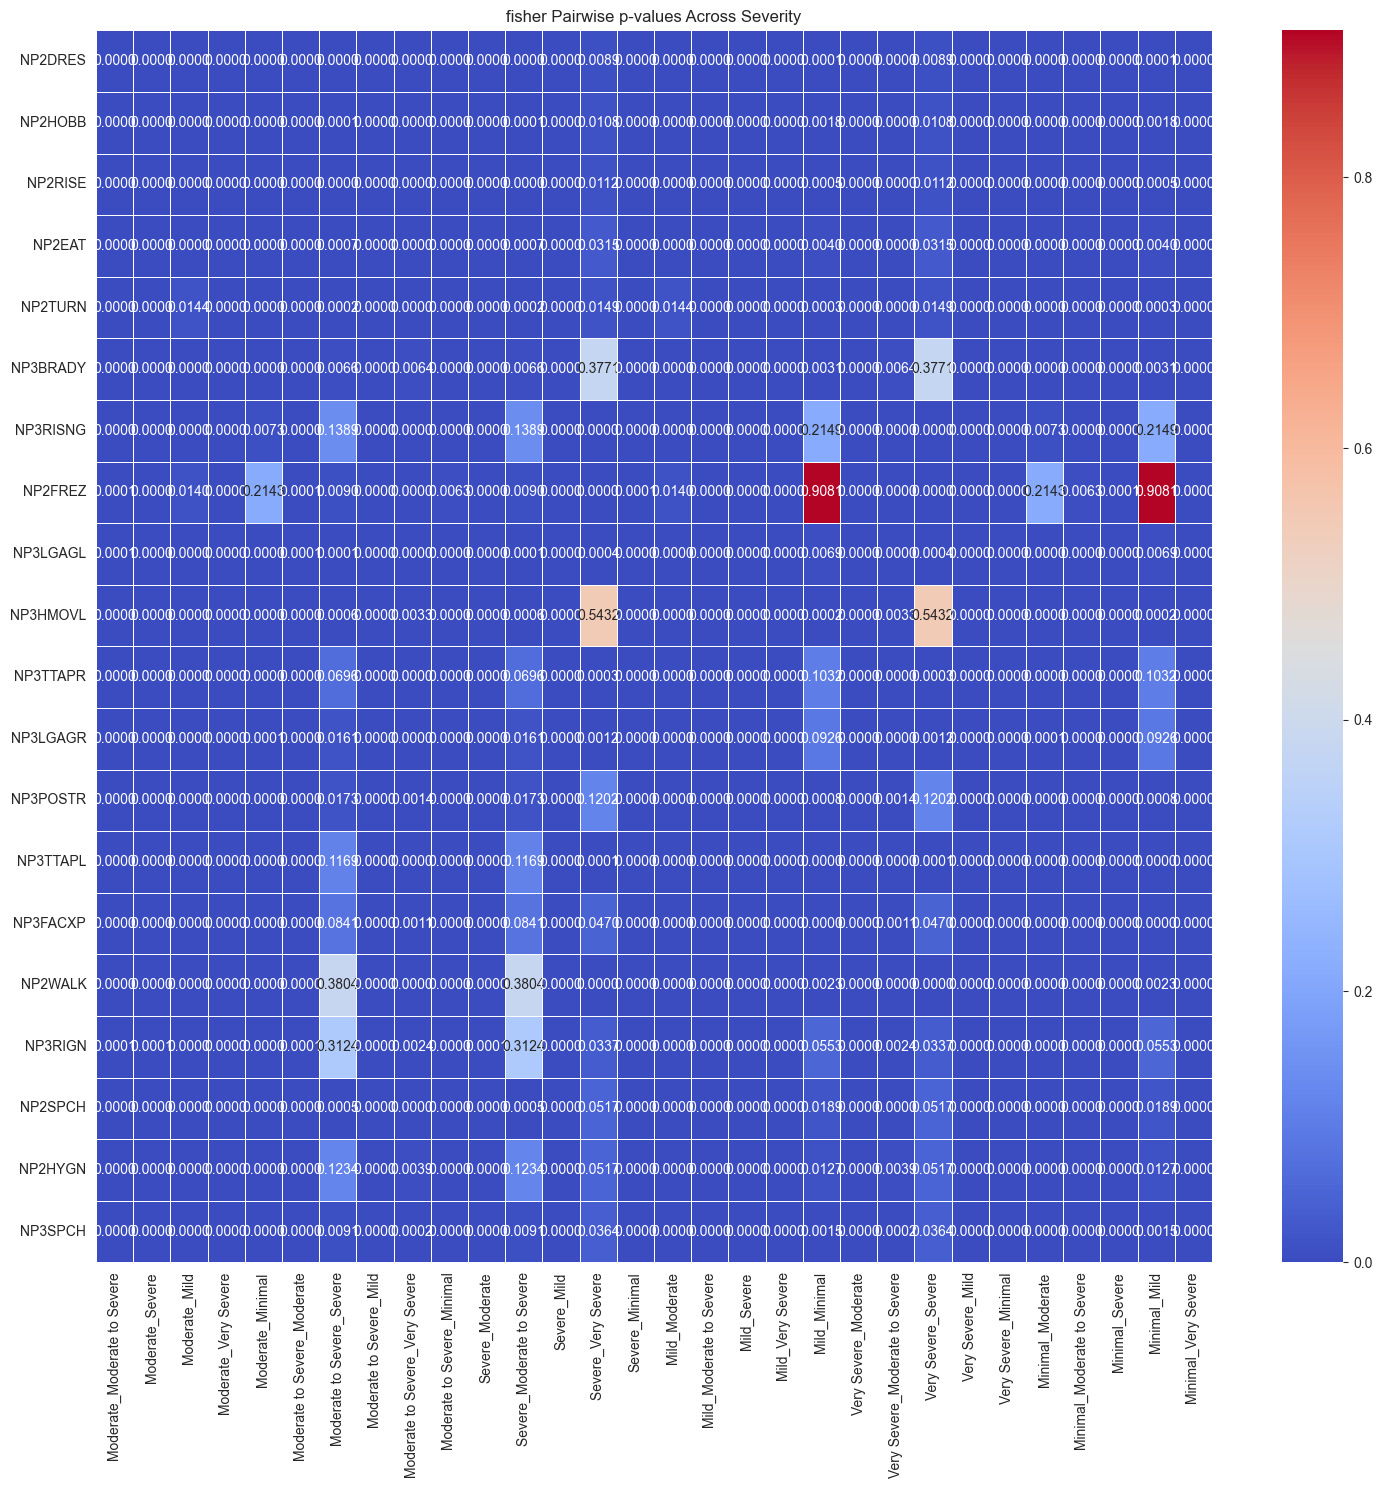

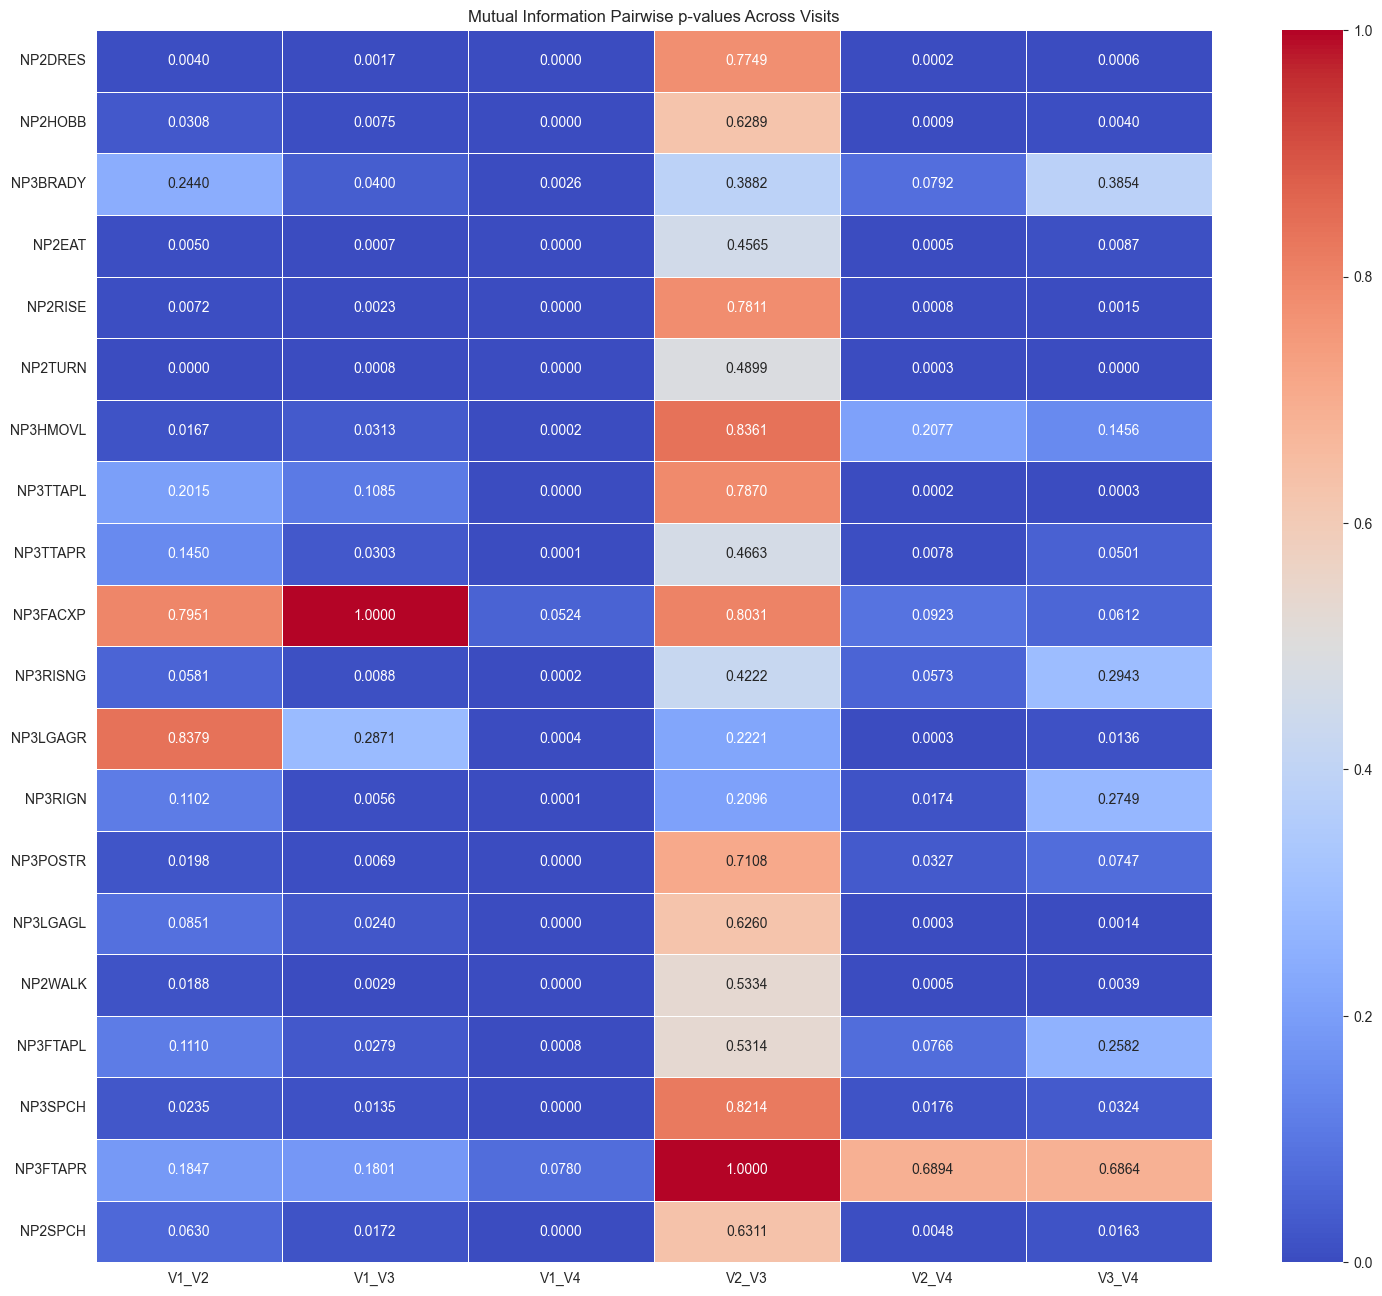

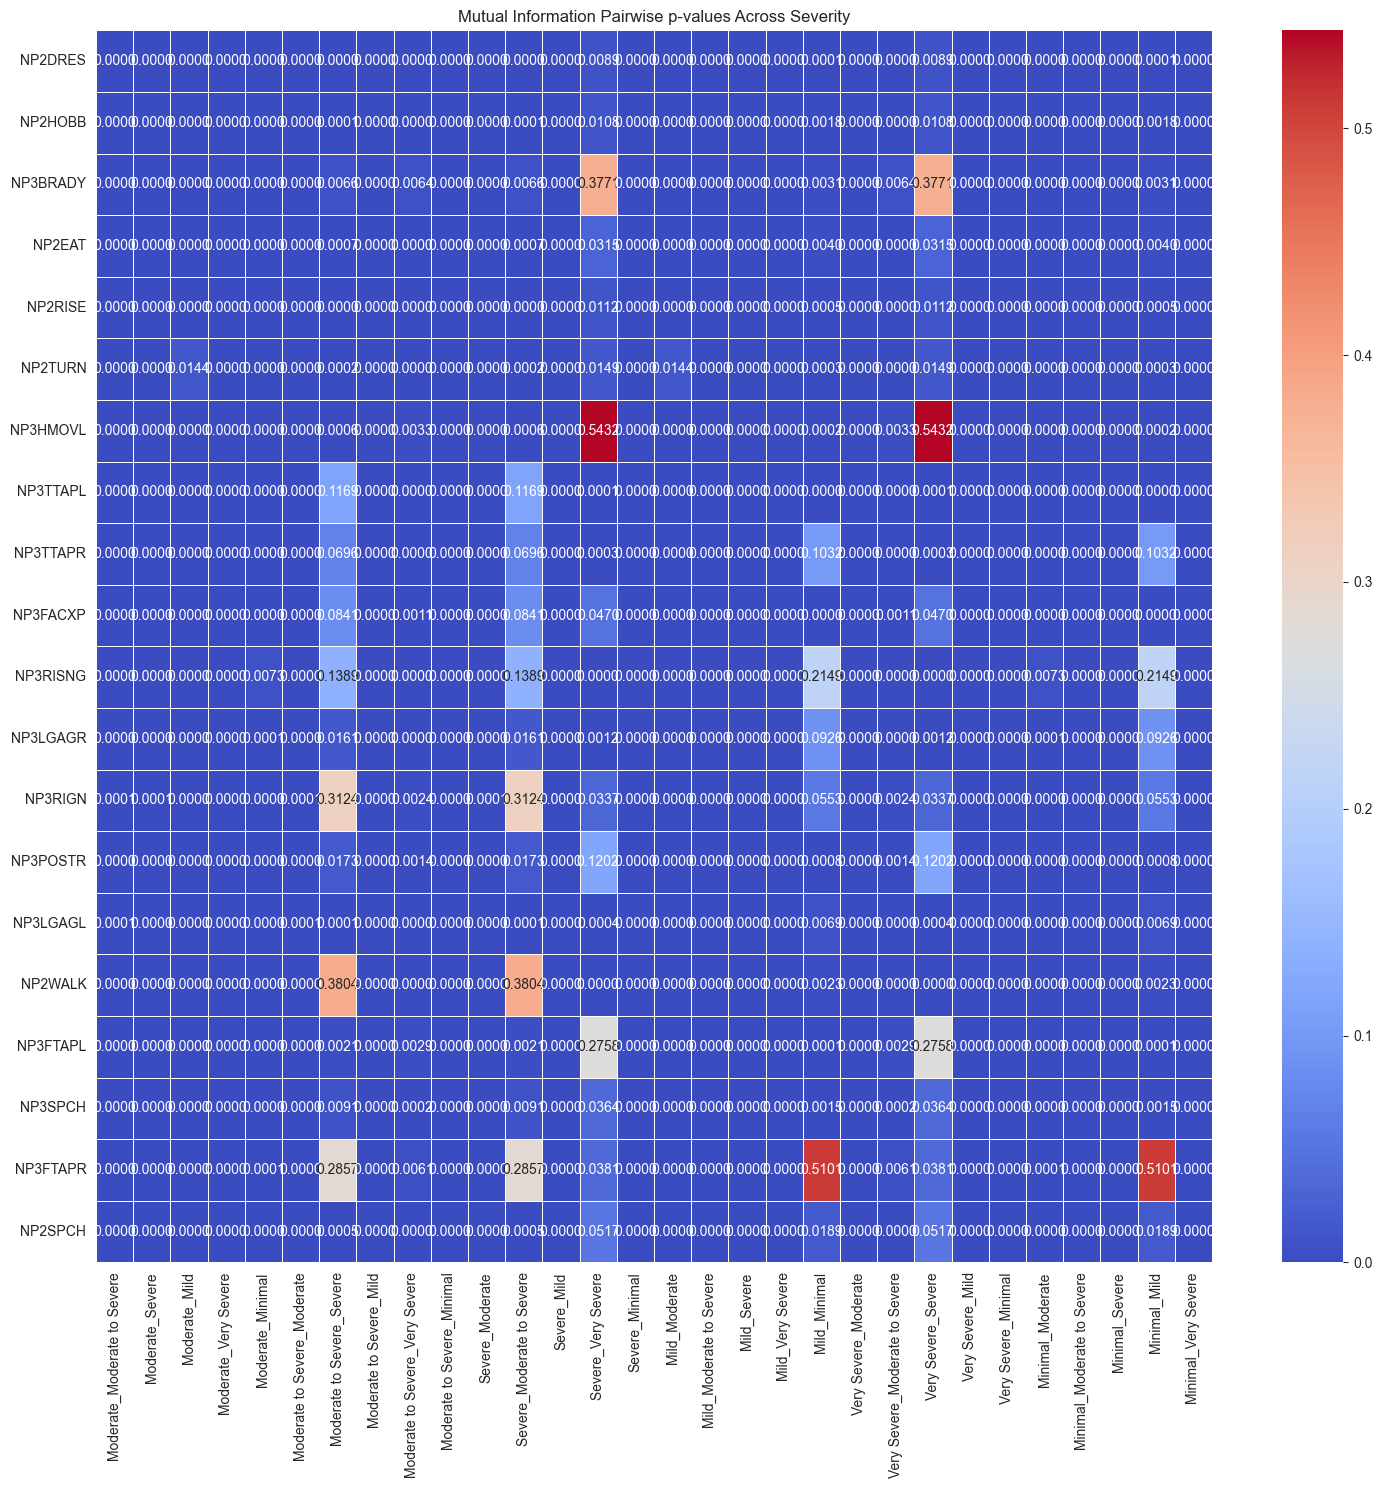

In [20]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define feature sets
# Define the feature lists
features_random_forest = [
   "NP3RIGN", "NP2HOBB", "NP2DRES", "NP3BRADY", "NP3POSTR", "Circularity", "Solidity", "NP3TTAPL", "NP2EAT", "homogeneity", "Extent", "lbp_energy", "gabor_energy", "Shannon_Entropy", "Minor axis length", "Major axis length", "NP2RISE", "NP3HMOVR", "ConvexArea", "correlation"
]

features_rfe = [
    "NP1ANXS", "NP1PAIN", "NP1SLPD", "NP2DRES", "NP2EAT", "NP2HOBB", "NP2RISE", "NP2SPCH", "NP2WALK", "NP3FACXP", "NP3FTAPL", "NP3FTAPR", "NP3LGAGR", "NP3POSTR", "NP3PRSPL", "NP3PTRML", "NP3RIGRU", "NP3RISNG", "NP3RTCON", "NP3TTAPL"
]

features_fisher_Score = [
  "NP2DRES", "NP2HOBB", "NP2RISE", "NP2EAT", "NP2TURN", "NP3BRADY", "NP3RISNG", "NP2FREZ", "NP3LGAGL", "NP3HMOVL", "NP3TTAPR", "NP3LGAGR", "NP3POSTR", "NP3TTAPL", "NP3FACXP", "NP2WALK", "NP3RIGN", "NP2SPCH", "NP2HYGN", "NP3SPCH"
]
features_mutual_info_score = ["NP2DRES", "NP2HOBB", "NP3BRADY", "NP2EAT", "NP2RISE", "NP2TURN", "NP3HMOVL", "NP3TTAPL", "NP3TTAPR", "NP3FACXP", "NP3RISNG", "NP3LGAGR", "NP3RIGN", "NP3POSTR", "NP3LGAGL", "NP2WALK", "NP3FTAPL", "NP3SPCH", "NP3FTAPR", "NP2SPCH"]

# Define visit pairs and severity levels
visit_pairs = [('V1', 'V2'), ('V1', 'V3'), ('V1', 'V4'), ('V2', 'V3'), ('V2', 'V4'), ('V3', 'V4')]
severity_levels = data['Disease_Severity'].unique()

# Function to perform t-tests and return DataFrame of p-values
def perform_ttests(features, visit_pairs, severity_levels):
    pairwise_p_values_visits = {}
    pairwise_p_values_severity = {}

    # T-Test Across Visits
    for feature in features:
        feature_p_values_visits = {}
        for v1, v2 in visit_pairs:
            data_v1 = data[data['Visit'] == v1][feature].dropna()
            data_v2 = data[data['Visit'] == v2][feature].dropna()

            if len(data_v1) > 1 and len(data_v2) > 1:  
                t_stat, p_value = ttest_ind(data_v1, data_v2, nan_policy='omit')
                feature_p_values_visits[f"{v1}_{v2}"] = p_value
            else:
                feature_p_values_visits[f"{v1}_{v2}"] = np.nan  

        pairwise_p_values_visits[feature] = feature_p_values_visits

    # Convert results for visits to DataFrame
    pairwise_p_values_visits_df = pd.DataFrame(pairwise_p_values_visits).T

    # T-Test Across Disease Severity
    for feature in features:
        feature_p_values_severity = {}
        for severity1 in severity_levels:
            for severity2 in severity_levels:
                if severity1 != severity2:
                    data_severity1 = data[data['Disease_Severity'] == severity1][feature].dropna()
                    data_severity2 = data[data['Disease_Severity'] == severity2][feature].dropna()

                    if len(data_severity1) > 1 and len(data_severity2) > 1:  
                        t_stat, p_value = ttest_ind(data_severity1, data_severity2, nan_policy='omit')
                        feature_p_values_severity[f"{severity1}_{severity2}"] = p_value
                    else:
                        feature_p_values_severity[f"{severity1}_{severity2}"] = np.nan  

        pairwise_p_values_severity[feature] = feature_p_values_severity

    # Convert results for severity to DataFrame
    pairwise_p_values_severity_df = pd.DataFrame(pairwise_p_values_severity).T

    return pairwise_p_values_visits_df, pairwise_p_values_severity_df

# Perform t-tests for each feature set
rf_visits, rf_severity = perform_ttests(features_random_forest, visit_pairs, severity_levels)
rfe_visits, rfe_severity = perform_ttests(features_rfe, visit_pairs, severity_levels)
fisher_visits, fisher_severity = perform_ttests(features_fisher_Score, visit_pairs, severity_levels)
mi_visits, mi_severity = perform_ttests(features_mutual_info_score, visit_pairs, severity_levels)

# Save results to CSV
rf_visits.to_csv("pair_wise_p_values_Ttest/rf_pairwise_p_values_visits.csv")
rf_severity.to_csv("pair_wise_p_values_Ttest/rf_pairwise_p_values_severity.csv")
rfe_visits.to_csv("pair_wise_p_values_Ttest/rfe_pairwise_p_values_visits.csv")
rfe_severity.to_csv("pair_wise_p_values_Ttest/rfe_pairwise_p_values_severity.csv")
fisher_visits.to_csv("pair_wise_p_values_Ttest/fisher_pairwise_p_values_visits.csv")
fisher_severity.to_csv("pair_wise_p_values_Ttest/fisher_pairwise_p_values_severity.csv")
mi_visits.to_csv("pair_wise_p_values_Ttest/mi_pairwise_p_values_visits.csv")
mi_severity.to_csv("pair_wise_p_values_Ttest/mi_pairwise_p_values_severity.csv")

# Print results
print("Random Forest Pairwise p-values across visits:")
print(rf_visits)
print("Random Forest Pairwise p-values across severity:")
print(rf_severity)

print("RFE Pairwise p-values across visits:")
print(rfe_visits)
print("RFE Pairwise p-values across severity:")
print(rfe_severity)

print("fisher Pairwise p-values across visits:")
print(fisher_visits)
print("fisher Pairwise p-values across severity:")
print(fisher_severity)

print("Mutual Information Pairwise p-values across visits:")
print(mi_visits)
print("Mutual Information Pairwise p-values across severity:")
print(mi_severity)

# Visualization for each feature set
def plot_heatmap(p_values_df, title):
    plt.figure(figsize=(18, 16))
    sns.heatmap(p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Plotting heatmaps for each feature set
plot_heatmap(rf_visits, "Random Forest Pairwise p-values Across Visits")
plot_heatmap(rf_severity, "Random Forest Pairwise p-values Across Severity")
plot_heatmap(rfe_visits, "RFE Pairwise p-values Across Visits")
plot_heatmap(rfe_severity, "RFE Pairwise p-values Across Severity")
plot_heatmap(fisher_visits, "fisher Pairwise p-values Across Visits")
plot_heatmap(fisher_severity, "fisher Pairwise p-values Across Severity")
plot_heatmap(mi_visits, "Mutual Information Pairwise p-values Across Visits")
plot_heatmap(mi_severity, "Mutual Information Pairwise p-values Across Severity")


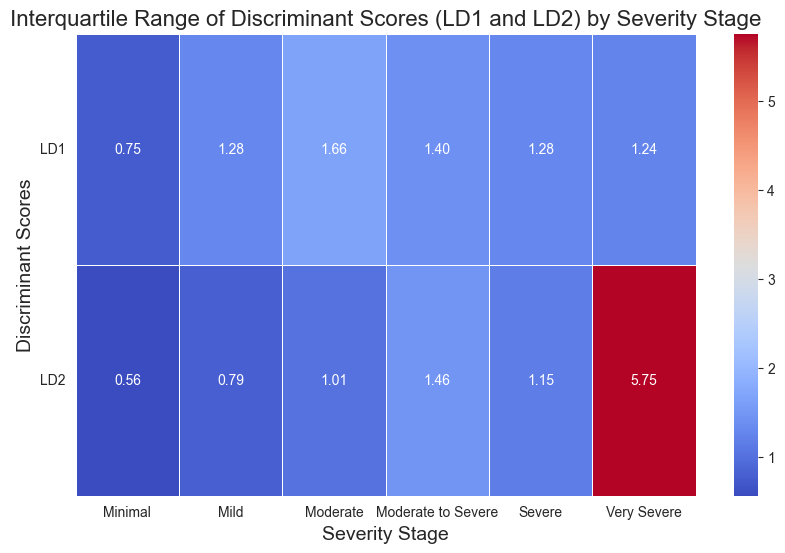

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the LDA scores and severity data
scores_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4', 'LD5'])
scores_df['Severity'] = y_original

# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Calculate the Q1 and Q3 for LD1 and LD2 for each severity level
q1_scores = scores_df.groupby('Severity')[['LD1', 'LD2']].quantile(0.25)
q3_scores = scores_df.groupby('Severity')[['LD1', 'LD2']].quantile(0.75)

# Create a DataFrame to hold IQR values
iqr_scores = q3_scores - q1_scores

# Reorder the index according to the correct order of severity levels
iqr_scores = iqr_scores.reindex(correct_order)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(iqr_scores.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Interquartile Range of Discriminant Scores (LD1 and LD2) by Severity Stage', fontsize=16)
plt.ylabel('Discriminant Scores', fontsize=14)
plt.xlabel('Severity Stage', fontsize=14)
plt.yticks(rotation=0)  # Keep the y-ticks horizontal for better readability
plt.show()


C:\Users\bubha\AppData\Local\Temp\ipykernel_13028\650061048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Severity', y='LD1', data=scores_df, order=correct_order, palette='pastel', showfliers=False)


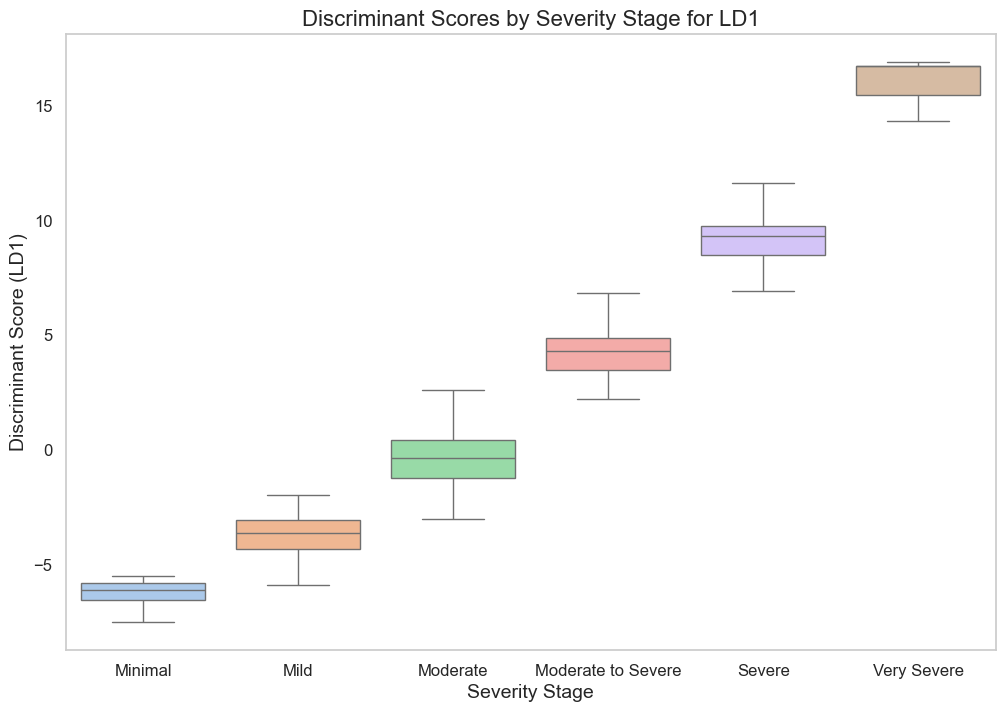

In [22]:
# Assuming you have the LDA scores
scores_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4', 'LD5'])
scores_df['Severity'] = y_original

# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style for the plot

# Create the boxplot without outliers
boxplot = sns.boxplot(x='Severity', y='LD1', data=scores_df, order=correct_order, palette='pastel', showfliers=False)

# Enhance the plot
boxplot.set_title('Discriminant Scores by Severity Stage for LD1', fontsize=16)
boxplot.set_xlabel('Severity Stage', fontsize=14)
boxplot.set_ylabel('Discriminant Score (LD1)', fontsize=14)  # Changed to LD1 for consistency

# Increase font size for x and y ticks
boxplot.tick_params(axis='both', labelsize=12)

# Optionally, add gridlines for better readability
plt.grid(visible=False)

plt.show()


C:\Users\bubha\AppData\Local\Temp\ipykernel_13028\4195717554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Severity', y='LD2', data=scores_df, order=correct_order, palette='pastel', showfliers=False)


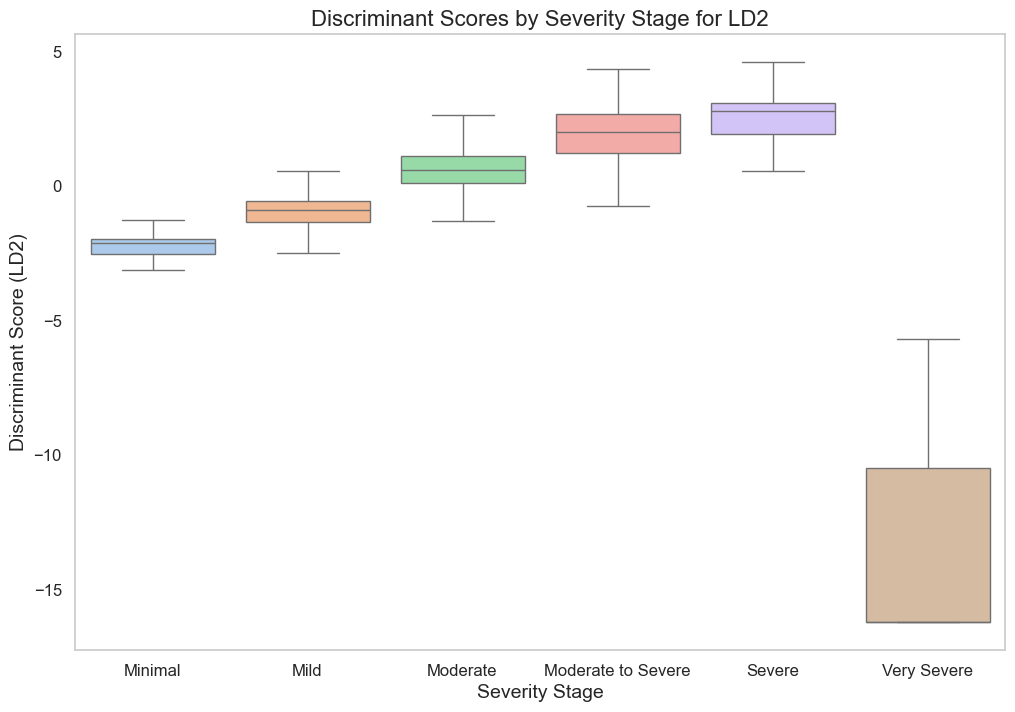

In [23]:
# Assuming you have the LDA scores
scores_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4', 'LDA5'])
scores_df['Severity'] = y_original

# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style for the plot

# Create the boxplot without outliers
boxplot = sns.boxplot(x='Severity', y='LD2', data=scores_df, order=correct_order, palette='pastel', showfliers=False)

# Enhance the plot
boxplot.set_title('Discriminant Scores by Severity Stage for LD2', fontsize=16)
boxplot.set_xlabel('Severity Stage', fontsize=14)
boxplot.set_ylabel('Discriminant Score (LD2)', fontsize=14)  # Changed to LD1 for consistency

# Increase font size for x and y ticks
boxplot.tick_params(axis='both', labelsize=12)

# Optionally, add gridlines for better readability
plt.grid(visible=False)

plt.show()


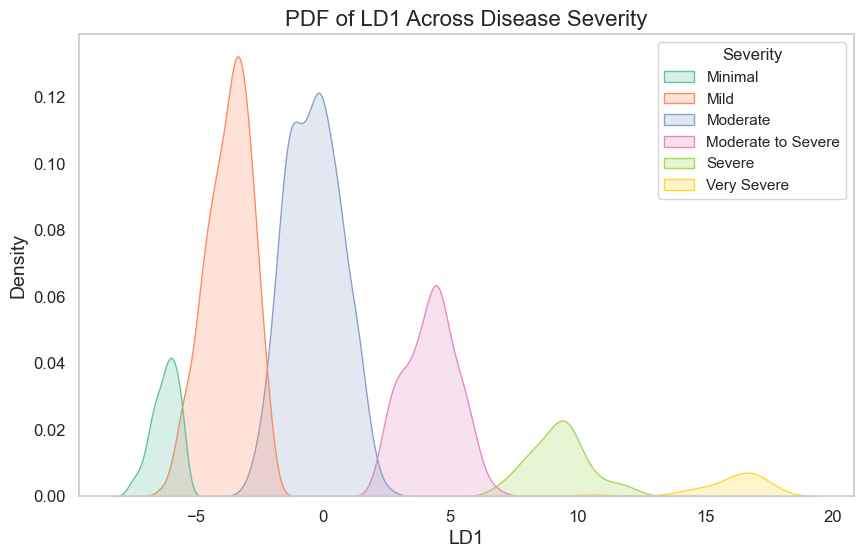

In [24]:
# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style for the plot

# Plot the KDE (PDF) for LD1 across different disease severity stages
sns.kdeplot(data=scores_df, x='LD1', hue='Severity', hue_order=correct_order, fill=True, palette='Set2')

# Enhance the plot
plt.title('PDF of LD1 Across Disease Severity', fontsize=16)
plt.xlabel('LD1', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Increase font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(visible=False)
plt.show()


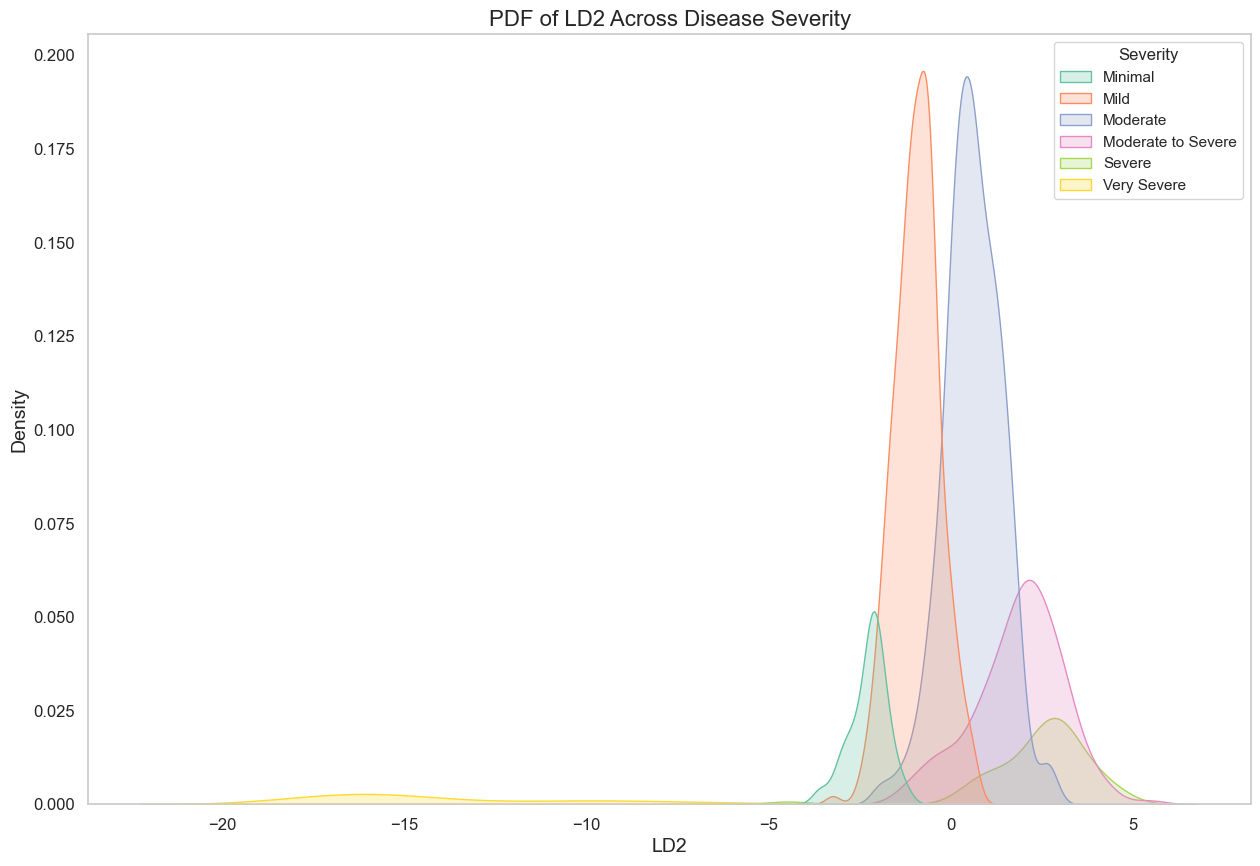

In [25]:
# Define the correct order of severity levels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  # Set the style for the plot

# Plot the KDE (PDF) for LD2 across different disease severity stages
sns.kdeplot(data=scores_df, x='LD2', hue='Severity', hue_order=correct_order, fill=True, palette='Set2')

# Enhance the plot
plt.title('PDF of LD2 Across Disease Severity', fontsize=16)
plt.xlabel('LD2', fontsize=14)  # Changed LD1 to LD2 for consistency with the plot
plt.ylabel('Density', fontsize=14)

# Increase font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Position the legend in the top-left corner

# Add grid lines for better readability
plt.grid(visible=False)

plt.show()


In [26]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare data for ANOVA test on LD1 across visits
anova_data_visit = pd.DataFrame({'LD1': X_lda[:, 0], 'Visit': data['Visit']})

# Fit the model for ANOVA
model = ols('LD1 ~ C(Visit)', data=anova_data_visit).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("ANOVA Results for LD1 Across Visits")
print(anova_table)
print()
kruskal_result = stats.kruskal(*[anova_data_visit['LD1'][anova_data_visit['Visit'] == severity]
                                  for severity in correct_order])

print("Kruskal-Wallis Test for LD1 Across Disease Severity:")
print(kruskal_result)


ANOVA Results for LD1 Across Visits
                sum_sq     df          F        PR(>F)
C(Visit)   1478.899073    3.0  24.959788  1.598913e-15
Residual  17933.383404  908.0        NaN           NaN

Kruskal-Wallis Test for LD1 Across Disease Severity:
KruskalResult(statistic=nan, pvalue=nan)


In [27]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare data for ANOVA test on LD1 across visits
anova_data_visit = pd.DataFrame({'LD2': X_lda[:, 1], 'Visit': data['Visit']})

# Fit the model for ANOVA
model = ols('LD2 ~ C(Visit)', data=anova_data_visit).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("ANOVA Results for LD2 Across Visits")
print(anova_table)
kruskal_result = stats.kruskal(*[anova_data_visit['LD2'][anova_data_visit['Visit'] == severity]
                                  for severity in correct_order])

print("Kruskal-Wallis Test for LD2 Across Disease Severity:")
print(kruskal_result)

ANOVA Results for LD2 Across Visits
               sum_sq     df         F    PR(>F)
C(Visit)    13.638847    3.0  0.684328  0.561726
Residual  6032.227686  908.0       NaN       NaN
Kruskal-Wallis Test for LD2 Across Disease Severity:
KruskalResult(statistic=nan, pvalue=nan)


In [28]:
# Prepare data for ANOVA test on LD1 across disease severity
anova_data_severity = pd.DataFrame({'LD1': X_lda[:, 0], 'Severity': y_original})

# Fit the model for ANOVA
model = ols('LD1 ~ C(Severity)', data=anova_data_severity).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("ANOVA Results for LD1 Across Disease Severity")
print(anova_table)

print()

# Perform Kruskal-Wallis test for LD1 across Disease Severity
kruskal_result = stats.kruskal(*[anova_data_severity['LD1'][anova_data_severity['Severity'] == severity]
                                  for severity in correct_order])

print("Kruskal-Wallis Test for LD1 Across Disease Severity:")
print(kruskal_result)

ANOVA Results for LD1 Across Disease Severity
                   sum_sq     df            F  PR(>F)
C(Severity)  18506.282478    5.0  3701.256496     0.0
Residual       906.000000  906.0          NaN     NaN

Kruskal-Wallis Test for LD1 Across Disease Severity:
KruskalResult(statistic=826.6563936494938, pvalue=1.9780004545690645e-176)


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test after ANOVA for Disease Severity
tukey = pairwise_tukeyhsd(endog=anova_data_severity['LD1'], groups=anova_data_severity['Severity'], alpha=0.05)

# Display Tukey HSD results
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1             group2       meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------
              Mild            Minimal  -2.4846   0.0 -2.9123  -2.057   True
              Mild           Moderate    3.351   0.0  3.1217  3.5804   True
              Mild Moderate to Severe   7.9308   0.0  7.6451  8.2165   True
              Mild             Severe  12.9649   0.0  12.553 13.3768   True
              Mild        Very Severe  19.6556   0.0 18.9786 20.3325   True
           Minimal           Moderate   5.8357   0.0  5.4144  6.2569   True
           Minimal Moderate to Severe  10.4154   0.0   9.961 10.8698   True
           Minimal             Severe  15.4495   0.0 14.9069 15.9922   True
           Minimal        Very Severe  22.1402   0.0 21.3766 22.9038   True
          Moderate Moderate to Severe   4.5797   0.0  4.3037  4.8558   True
          Mo

In [30]:
# Prepare data for ANOVA test on LD1 across disease severity
anova_data_severity = pd.DataFrame({'LD2': X_lda[:, 1], 'Severity': y_original})

# Fit the model for ANOVA
model = ols('LD2 ~ C(Severity)', data=anova_data_severity).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("ANOVA Results for LD2 Across Disease Severity")
print(anova_table)

print()

# Perform Kruskal-Wallis test for LD1 across Disease Severity
kruskal_result = stats.kruskal(*[anova_data_severity['LD2'][anova_data_severity['Severity'] == severity]
                                  for severity in correct_order])

print("Kruskal-Wallis Test for LD2 Across Disease Severity:")
print(kruskal_result)


ANOVA Results for LD2 Across Disease Severity
                  sum_sq     df            F  PR(>F)
C(Severity)  5139.866533    5.0  1027.973307     0.0
Residual      906.000000  906.0          NaN     NaN

Kruskal-Wallis Test for LD2 Across Disease Severity:
KruskalResult(statistic=659.3694330935118, pvalue=2.986986838488257e-140)


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test after ANOVA for Disease Severity
tukey = pairwise_tukeyhsd(endog=anova_data_severity['LD2'], groups=anova_data_severity['Severity'], alpha=0.05)

# Display Tukey HSD results
print(tukey)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------------
              Mild            Minimal  -1.3277   0.0  -1.7554  -0.9001   True
              Mild           Moderate   1.5305   0.0   1.3011   1.7598   True
              Mild Moderate to Severe   2.7867   0.0   2.5009   3.0724   True
              Mild             Severe   3.4022   0.0   2.9903   3.8141   True
              Mild        Very Severe   -12.86   0.0  -13.537 -12.1831   True
           Minimal           Moderate   2.8582   0.0    2.437   3.2795   True
           Minimal Moderate to Severe   4.1144   0.0     3.66   4.5688   True
           Minimal             Severe     4.73   0.0   4.1873   5.2726   True
           Minimal        Very Severe -11.5323   0.0 -12.2959 -10.7687   True
          Moderate Moderate to Severe   1.2562   0.0   0.9802   

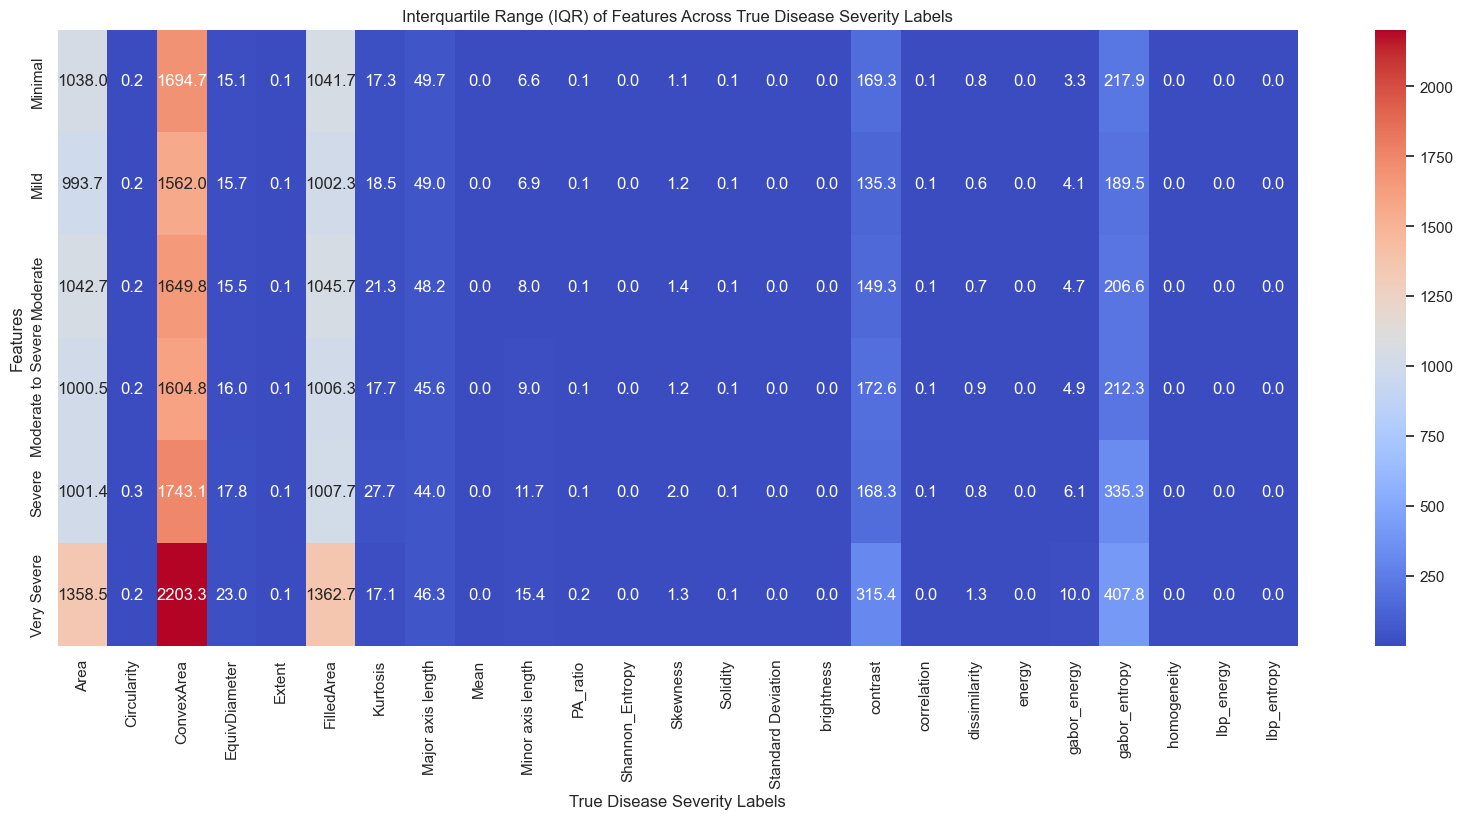

In [32]:
# Define a function to calculate IQR using the original unscaled data
def calculate_iqr(group):
    q1 = group.quantile(0.25)  # 25th percentile
    q3 = group.quantile(0.75)  # 75th percentile
    iqr = q3 - q1
    return pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr})

# Initialize dictionary to store IQR results for the true labels (y)
iqr_results_true_labels = {}

# Calculate IQR for each true disease severity label
for label in np.unique(y):
    label_data = original_data[y == label]
    iqr_results_true_labels[label] = calculate_iqr(label_data)

# Convert the results into a DataFrame
iqr_df_true_labels = pd.concat(iqr_results_true_labels, axis=1)

# Extract only the IQR values for visualization
iqr_values_true_labels = iqr_df_true_labels.xs('IQR', level=1, axis=1)

# Replace the numerical labels with actual severity labels using the label encoder
iqr_values_true_labels.columns = le.inverse_transform(iqr_values_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
iqr_values_true_labels = iqr_values_true_labels[correct_order]

# Visualize the IQR values for true labels (disease severity) in the correct order
plt.figure(figsize=(20, 8))
sns.heatmap(iqr_values_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Interquartile Range (IQR) of Features Across True Disease Severity Labels')
plt.xlabel('True Disease Severity Labels')
plt.ylabel('Features')
plt.show()


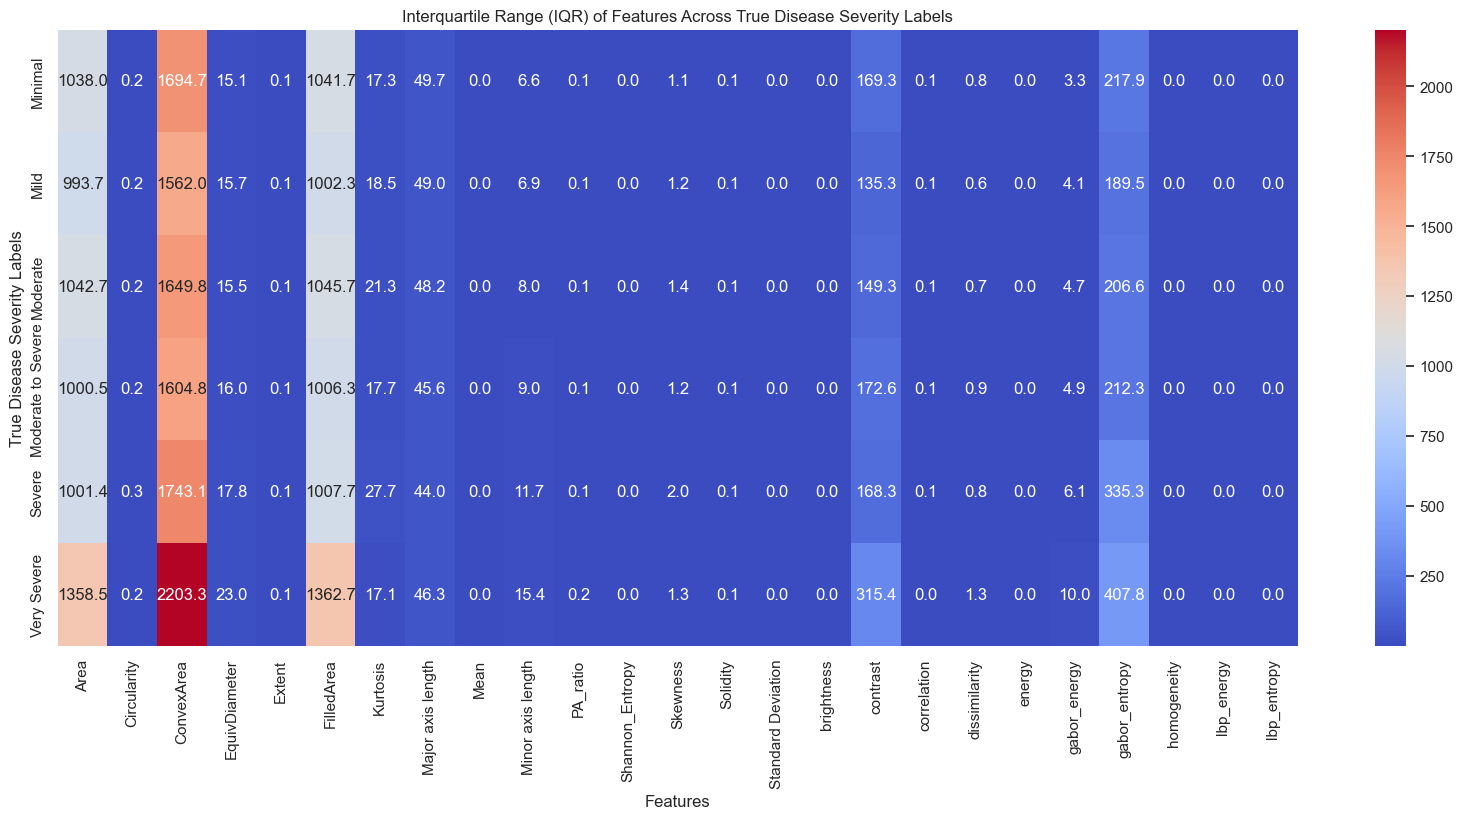

In [33]:
# Function to calculate the interquartile range (IQR) for each feature
def calculate_iqr(group):
    q1 = group.quantile(0.25)  # 25th percentile
    q3 = group.quantile(0.75)  # 75th percentile
    iqr = q3 - q1
    return pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr})

# Initialize dictionary to store IQR results for true labels
iqr_results_true_labels = {}

# Loop through each true label and calculate IQR for each label's features
for label in np.unique(y):
    label_data = data[y == label][numerical_features]  # Group by true labels
    iqr_results_true_labels[label] = calculate_iqr(label_data)

# Convert the results into a DataFrame
iqr_df_true_labels = pd.concat(iqr_results_true_labels, axis=1)

# Extract only the IQR values for visualization
iqr_values_true_labels = iqr_df_true_labels.xs('IQR', level=1, axis=1)

# Replace the numerical labels with actual severity labels using the label encoder
iqr_values_true_labels.columns = le.inverse_transform(iqr_values_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
iqr_values_true_labels = iqr_values_true_labels[correct_order]

# Visualize the IQR values for true labels (disease severity) in the correct order
plt.figure(figsize=(20, 8))
sns.heatmap(iqr_values_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Interquartile Range (IQR) of Features Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


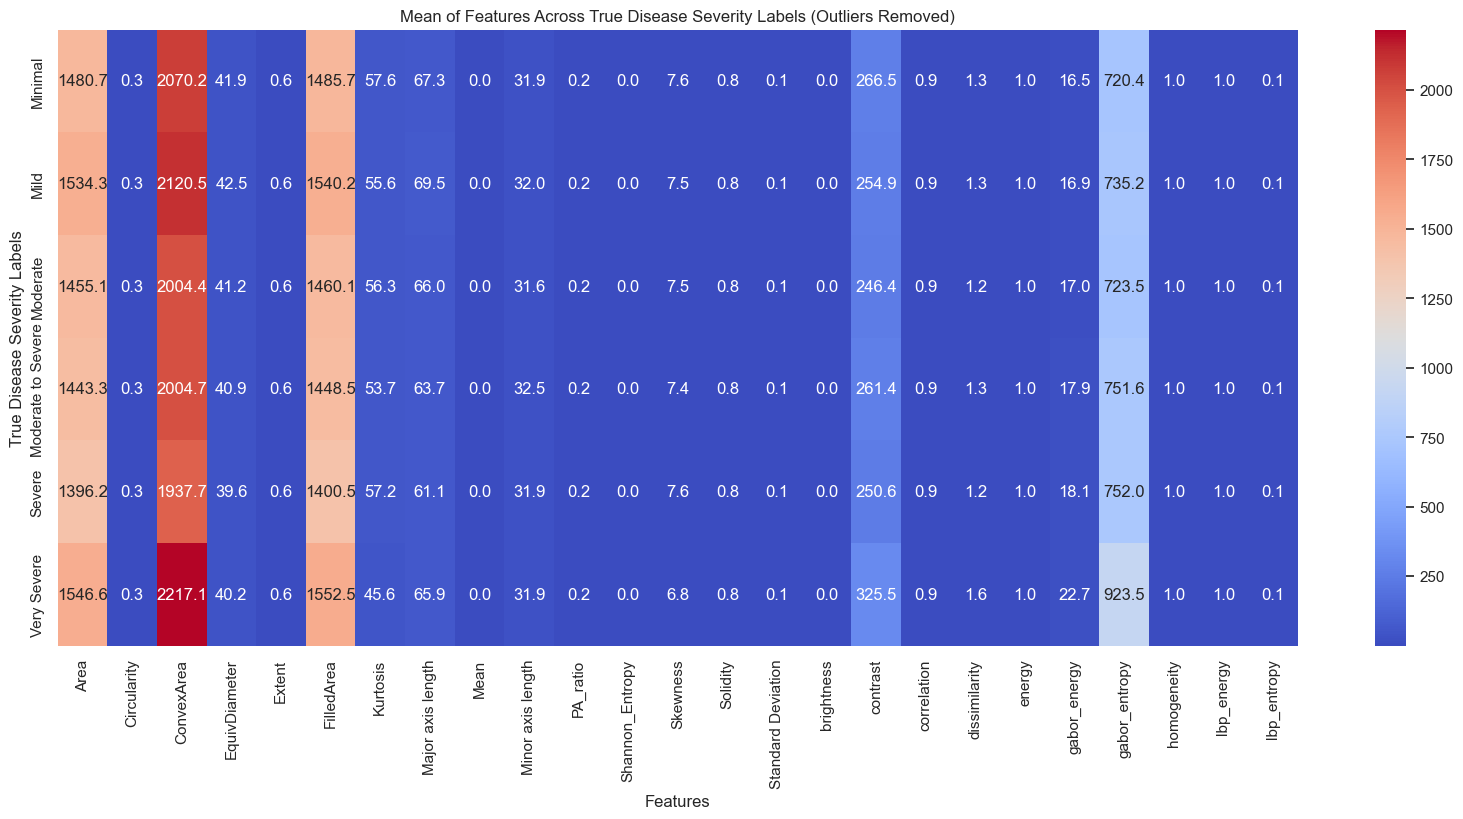

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calculate mean for each true disease severity label after removing outliers
mean_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    
    # Remove outliers
    filtered_data = remove_outliers_iqr(label_data)
    
    mean_results_true_labels[label] = filtered_data.mean()

# Convert the results into a DataFrame
mean_df_true_labels = pd.DataFrame(mean_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
mean_df_true_labels.columns = le.inverse_transform(mean_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mean_df_true_labels = mean_df_true_labels[correct_order]

# Visualize the mean values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(mean_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mean of Features Across True Disease Severity Labels (Outliers Removed)')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


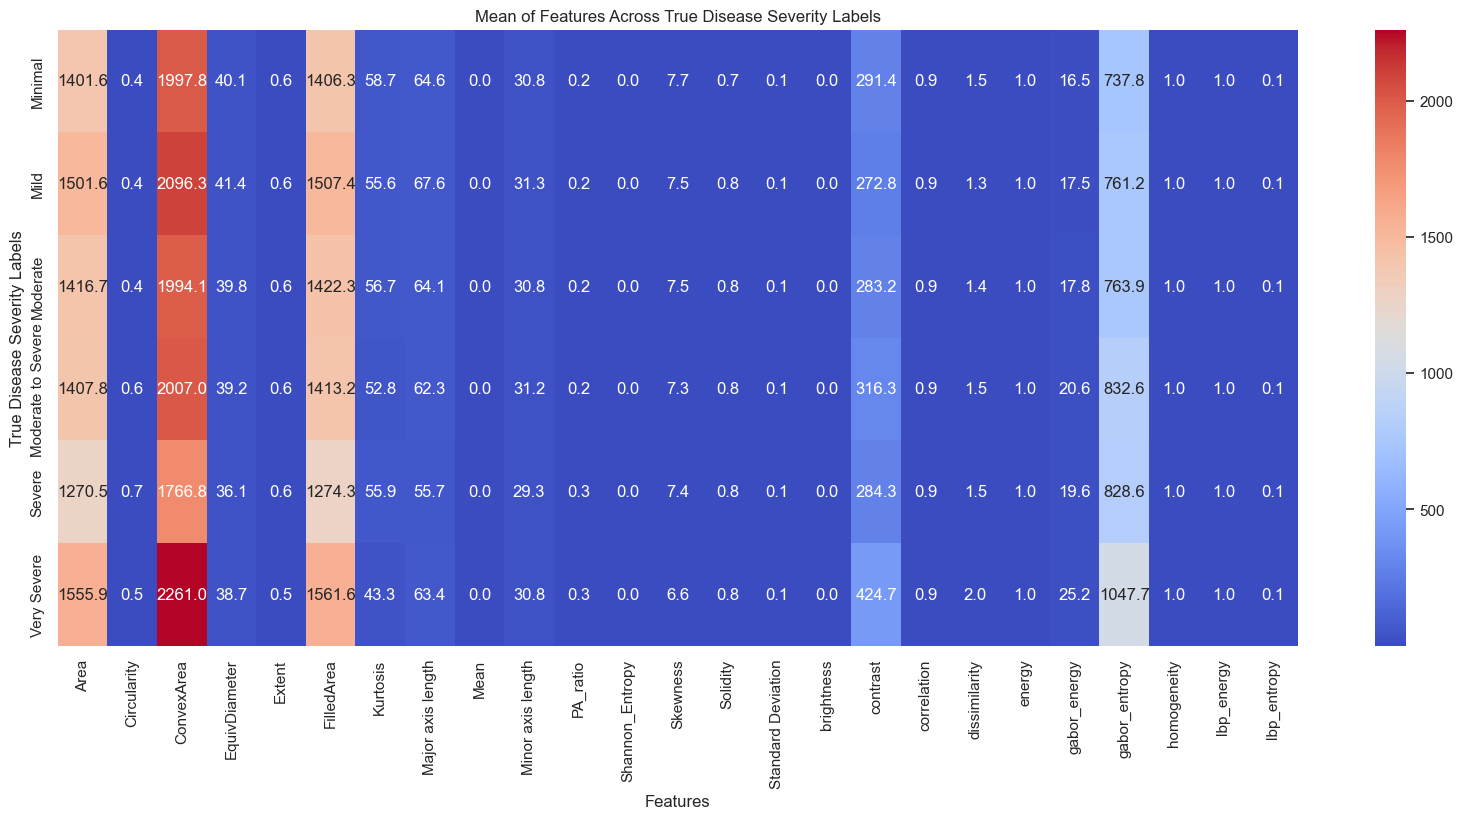

In [35]:
# Calculate mean for each true disease severity label
mean_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    mean_results_true_labels[label] = label_data.mean()

# Convert the results into a DataFrame
mean_df_true_labels = pd.DataFrame(mean_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
mean_df_true_labels.columns = le.inverse_transform(mean_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mean_df_true_labels = mean_df_true_labels[correct_order]

# Visualize the mean values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(mean_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mean of Features Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


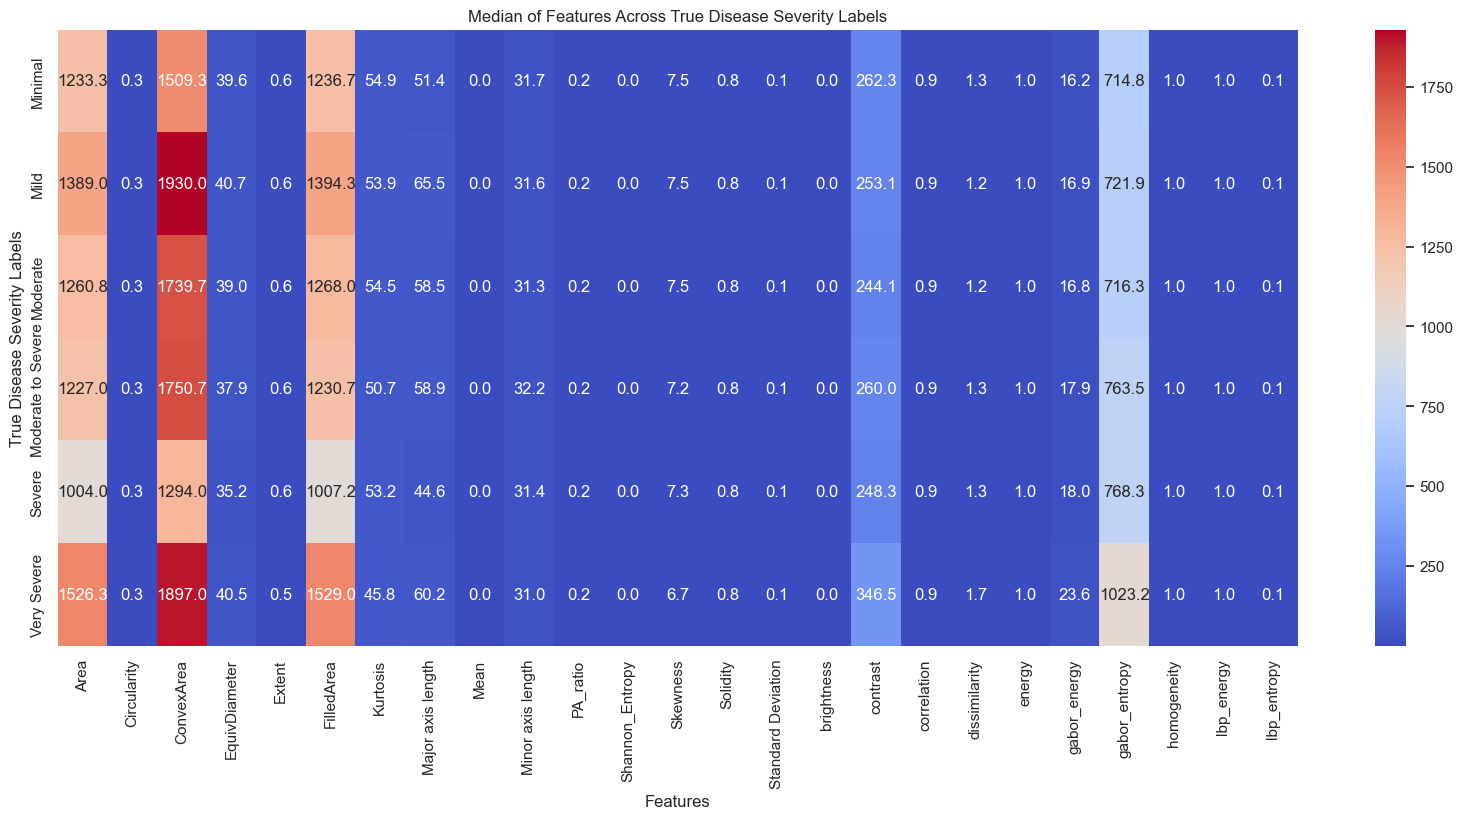

In [36]:
# Calculate median for each true disease severity label
median_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    median_results_true_labels[label] = label_data.median()

# Convert the results into a DataFrame
median_df_true_labels = pd.DataFrame(median_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
median_df_true_labels.columns = le.inverse_transform(median_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
median_df_true_labels = median_df_true_labels[correct_order]

# Visualize the median values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(median_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Median of Features Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


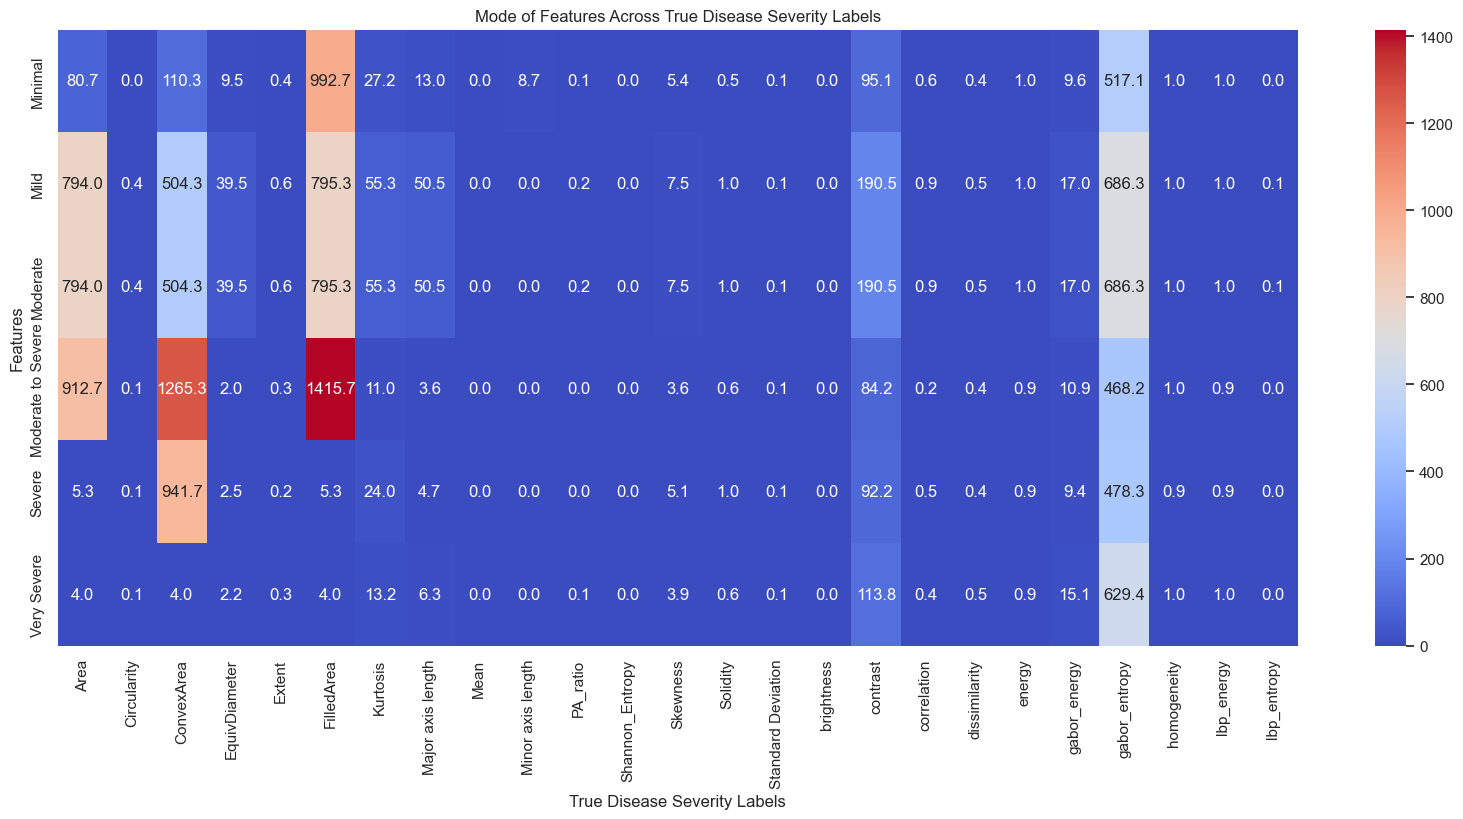

In [37]:
# Function to calculate mode for each feature
def calculate_mode(group):
    return group.mode().iloc[0]  # Select the first mode value in case of multiple modes

# Calculate mode for each true disease severity label
mode_results_true_labels = {}

for label in np.unique(y):
    label_data = original_data[y == label]
    mode_results_true_labels[label] = calculate_mode(label_data)

# Convert the results into a DataFrame
mode_df_true_labels = pd.DataFrame(mode_results_true_labels)

# Replace the numerical labels with actual severity labels using the label encoder
mode_df_true_labels.columns = le.inverse_transform(mode_df_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mode_df_true_labels = mode_df_true_labels[correct_order]

# Visualize the mode values for true labels (disease severity)
plt.figure(figsize=(20, 8))
sns.heatmap(mode_df_true_labels.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mode of Features Across True Disease Severity Labels')
plt.xlabel('True Disease Severity Labels')
plt.ylabel('Features')
plt.show()


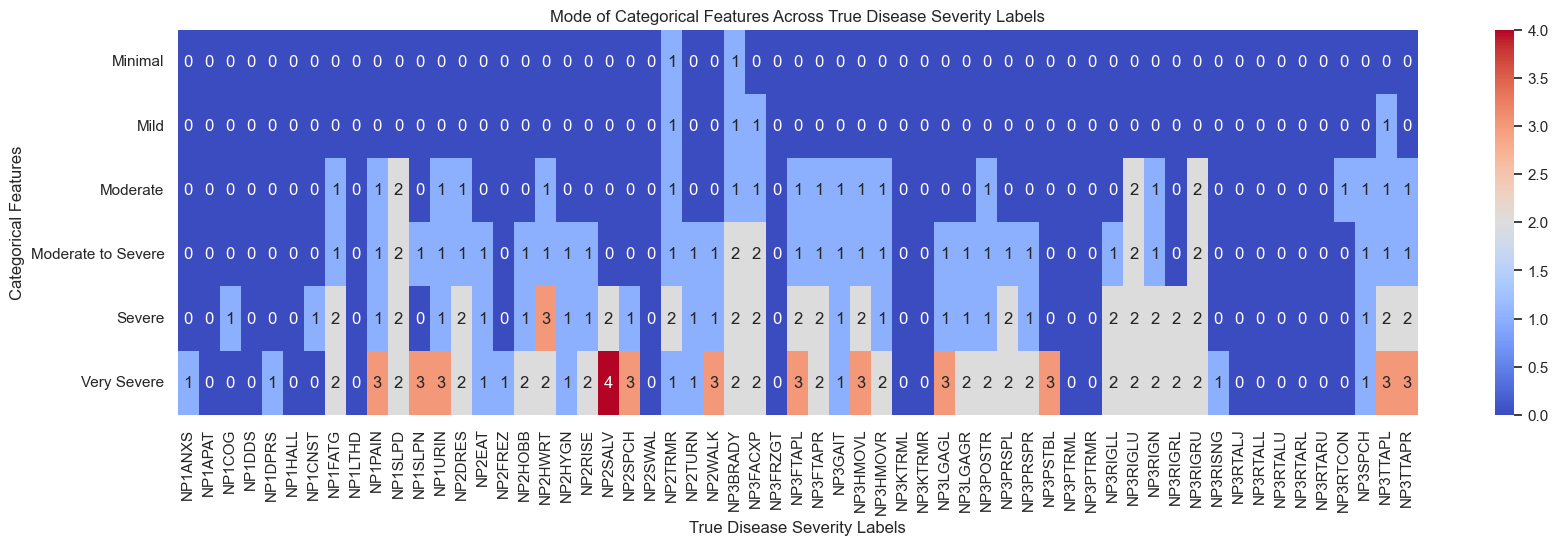

In [38]:
# Function to compute mode for categorical features
def compute_mode(df):
    return df.mode().iloc[0]  # mode() returns a DataFrame; we take the first mode value

# Calculate mode values of categorical features for each true disease severity label (y)
mode_results_true_labels = pd.DataFrame()

for label in np.unique(y):
    label_data = data[y == label][categorical_features]
    mode_results_true_labels[label] = compute_mode(label_data)

# Replace the numerical labels with actual severity labels using the label encoder
mode_results_true_labels.columns = le.inverse_transform(mode_results_true_labels.columns)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the columns based on the correct disease severity order
mode_results_true_labels = mode_results_true_labels[correct_order]

# Visualize the mode values of categorical features for each true disease severity label
plt.figure(figsize=(20, 5))
sns.heatmap(mode_results_true_labels.T, cmap='coolwarm', annot=True)
plt.title('Mode of Categorical Features Across True Disease Severity Labels')
plt.xlabel('True Disease Severity Labels')
plt.ylabel('Categorical Features')
plt.show()


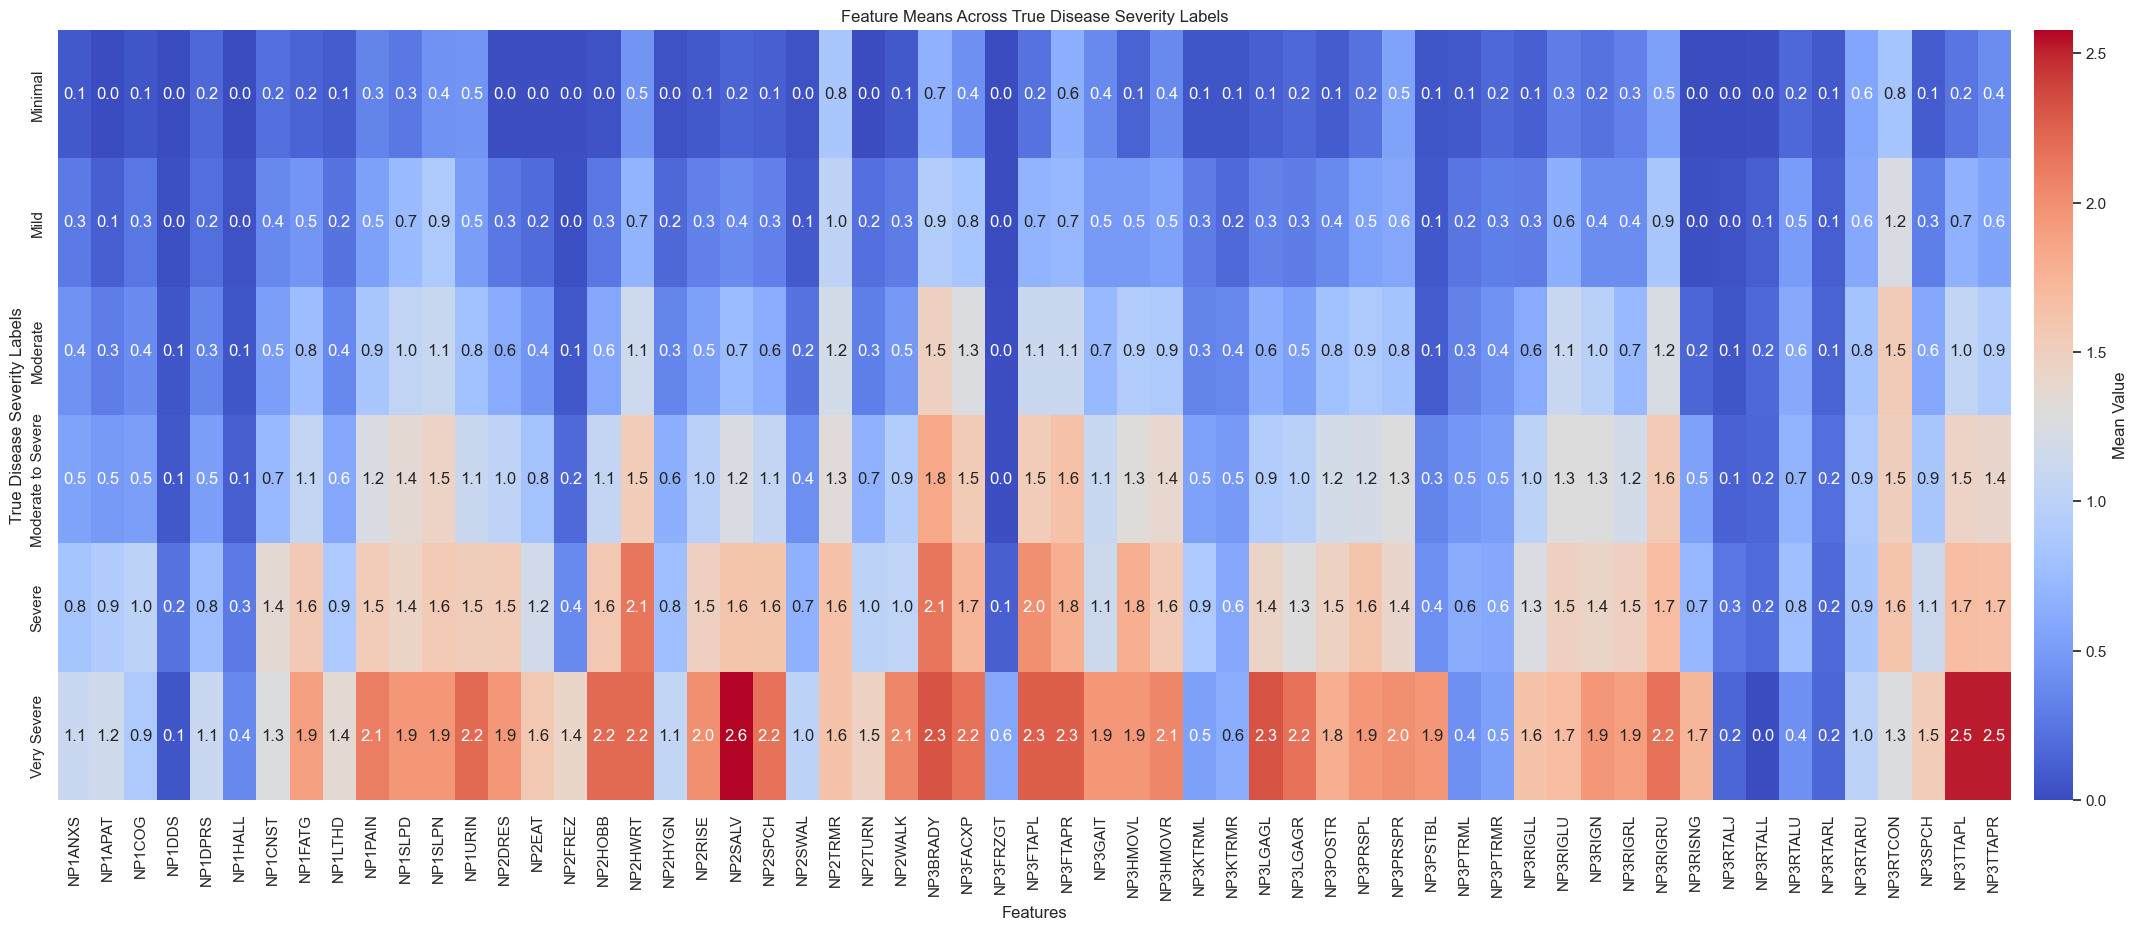

In [39]:
# Calculate mean values of numerical features for each true disease severity label (y)
mean_results_true_labels = data.groupby(y)[categorical_features].mean()  # Use numerical_features instead of categorical_features

# Replace the numerical labels with actual severity labels using the label encoder
mean_results_true_labels.index = le.inverse_transform(mean_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
mean_results_true_labels = mean_results_true_labels.reindex(correct_order)

# Visualize the mean values of numerical features for each true disease severity label
plt.figure(figsize=(30, 10))
sns.heatmap(mean_results_true_labels, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={"orientation": "vertical", "pad": 0.01, "label": "Mean Value"})  # Adjust color bar
plt.title('Feature Means Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()


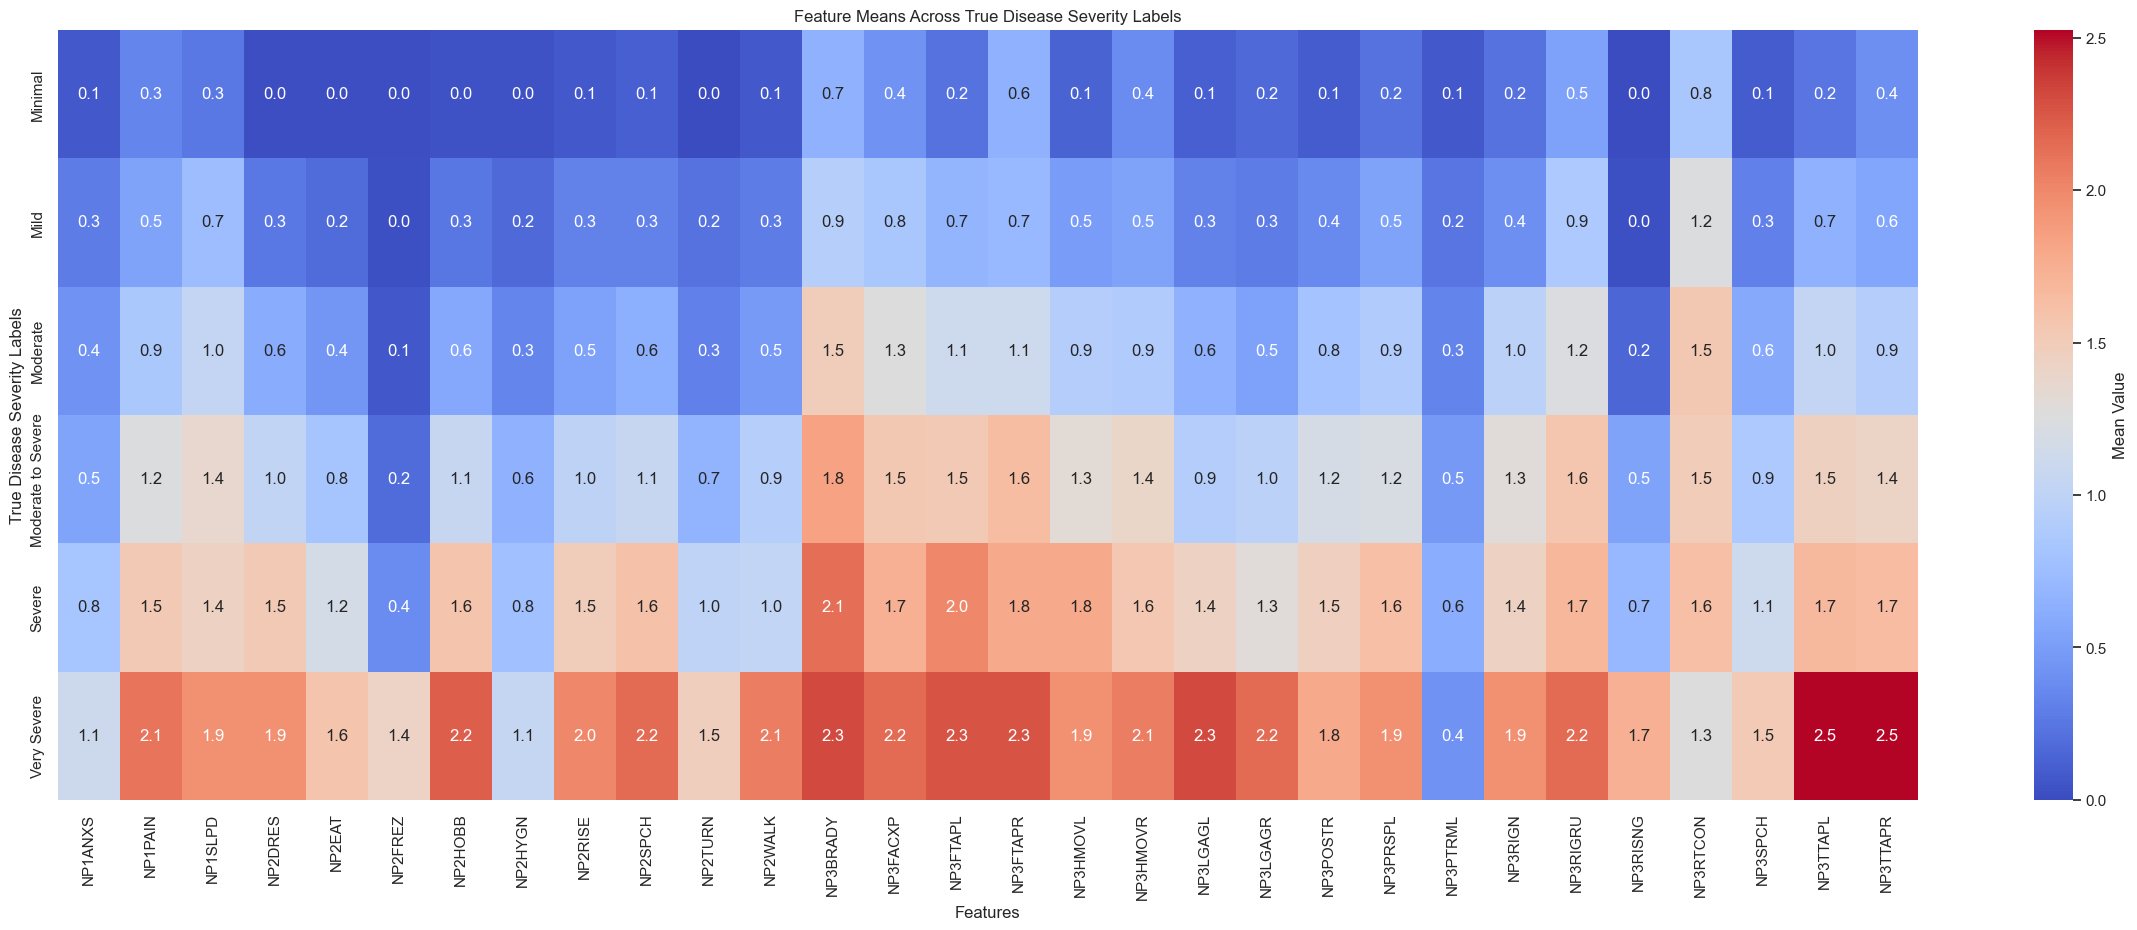

In [40]:
features_to_test = [
   'NP1ANXS', 'NP1PAIN', 'NP1SLPD', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB', 'NP2HYGN', 'NP2RISE', 'NP2SPCH', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FTAPL', 'NP3FTAPR', 'NP3HMOVL', 'NP3HMOVR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PTRML', 'NP3RIGN', 'NP3RIGRU', 'NP3RISNG', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
]
# Calculate mean values of numerical features for each true disease severity label (y)
mean_results_true_labels = data.groupby(y)[features_to_test].mean()  # Use numerical_features instead of categorical_features

# Replace the numerical labels with actual severity labels using the label encoder
mean_results_true_labels.index = le.inverse_transform(mean_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
mean_results_true_labels = mean_results_true_labels.reindex(correct_order)

# Visualize the mean values of numerical features for each true disease severity label
plt.figure(figsize=(30, 10))
sns.heatmap(mean_results_true_labels, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={"orientation": "vertical",  "label": "Mean Value"})  # Adjust color bar
plt.title('Feature Means Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Features')
plt.show()

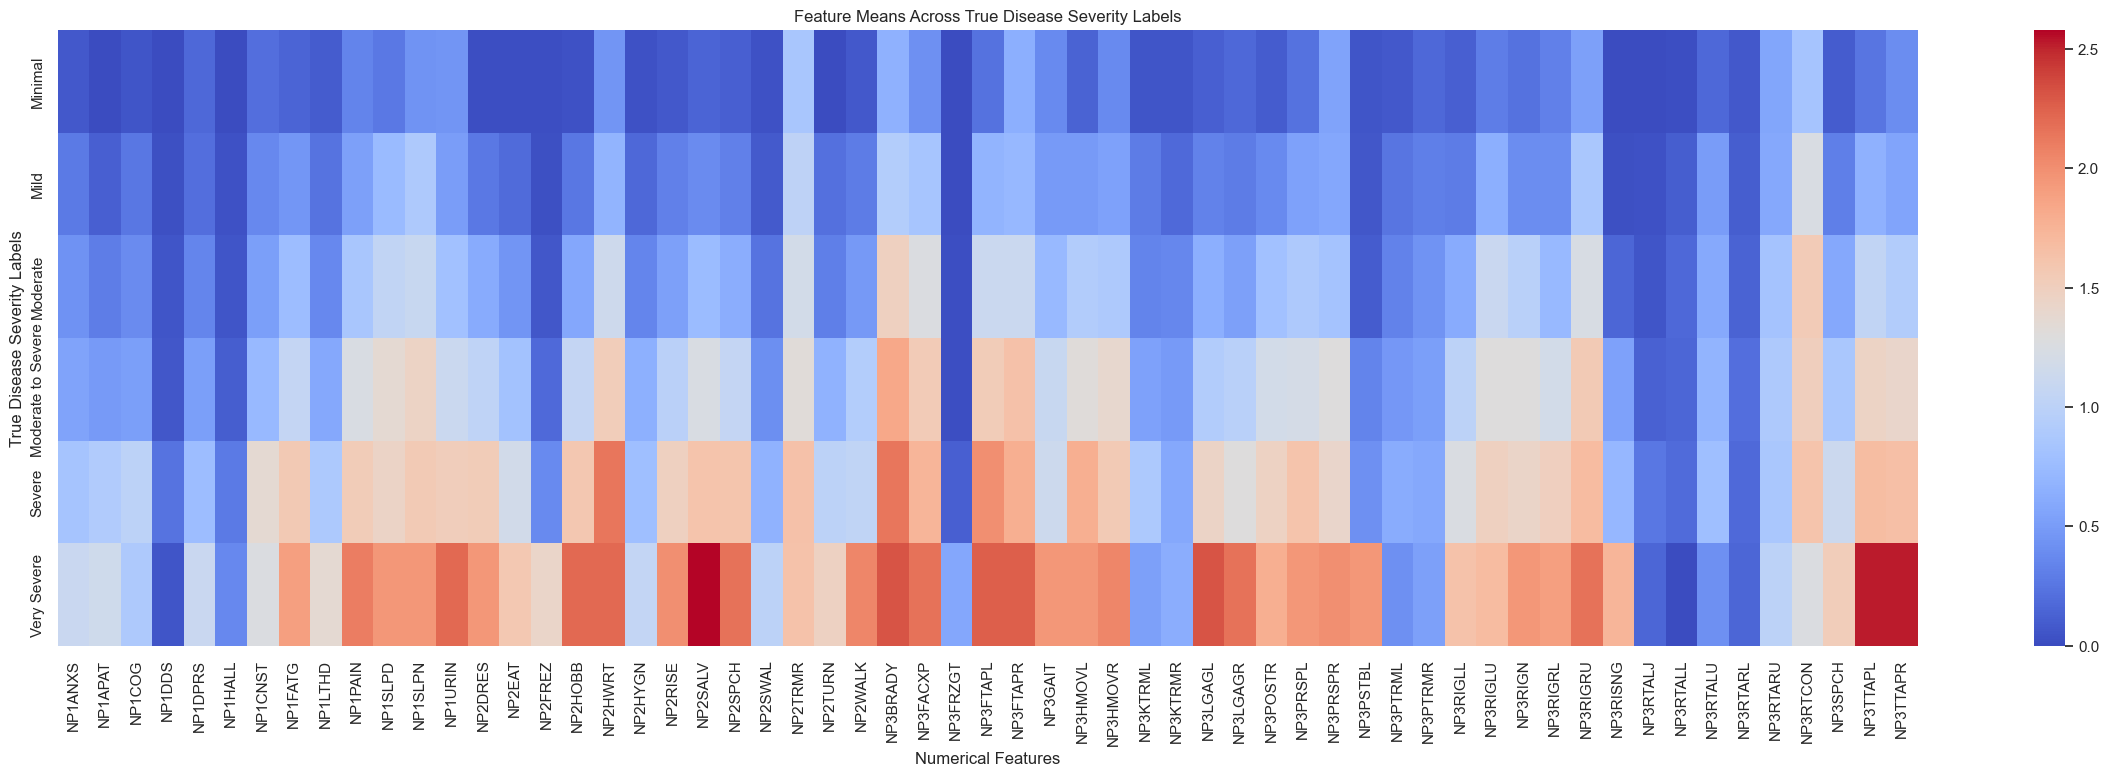

In [41]:
# Calculate mean values of numerical features for each true disease severity label (y)
mean_results_true_labels = data.groupby(y)[categorical_features].mean()

# Replace the numerical labels with actual severity labels using the label encoder
mean_results_true_labels.index = le.inverse_transform(mean_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
mean_results_true_labels = mean_results_true_labels.reindex(correct_order)

# Visualize the mean values of numerical features for each true disease severity label
plt.figure(figsize=(30, 8))
sns.heatmap(mean_results_true_labels, cmap='coolwarm', annot=False)  # Set annot=False for no values
plt.title('Feature Means Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Numerical Features')
plt.show()


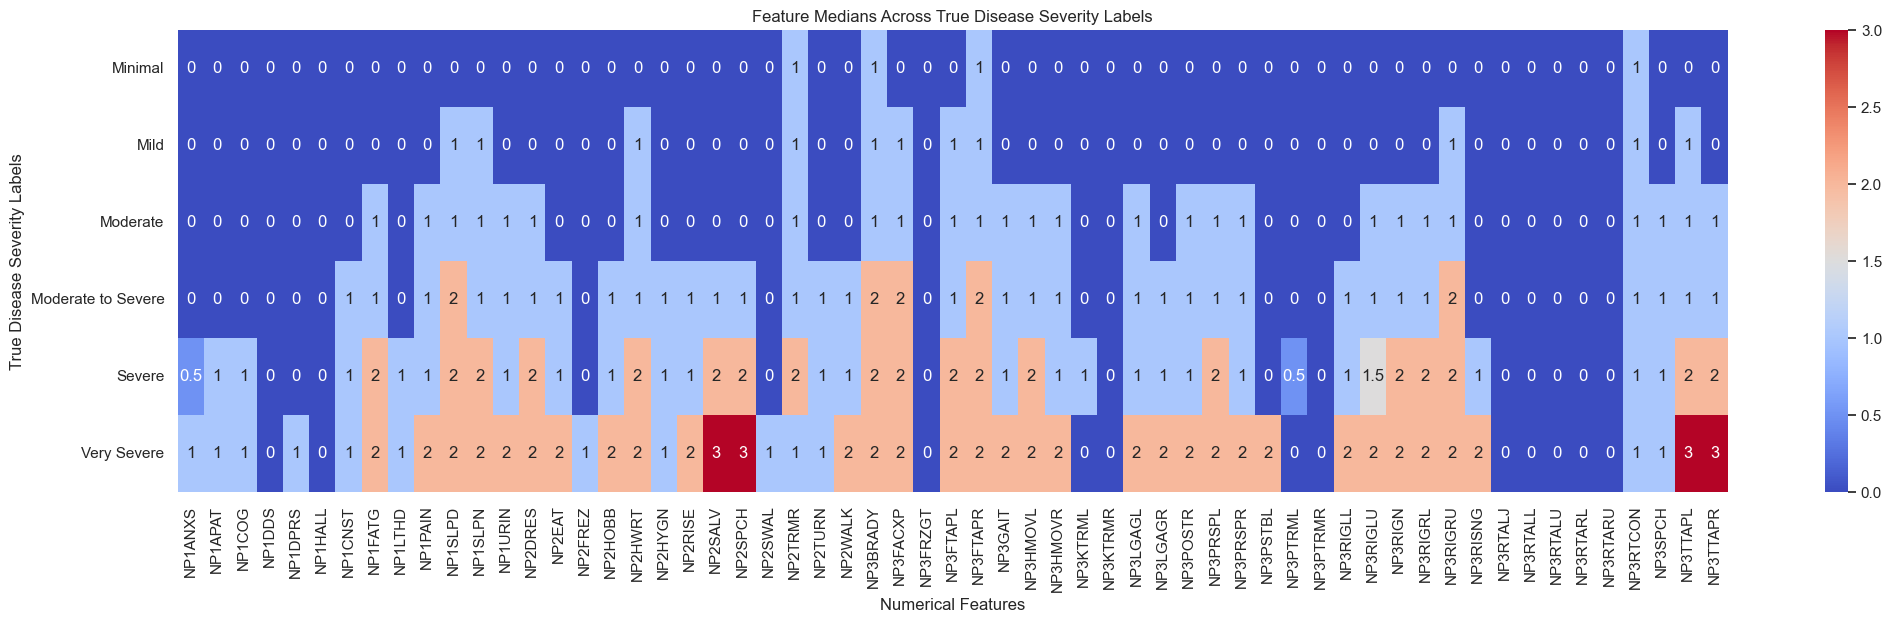

In [42]:
# Calculate median values of numerical features for each true disease severity label (y)
median_results_true_labels = data.groupby(y)[categorical_features].median()

# Replace the numerical labels with actual severity labels using the label encoder
median_results_true_labels.index = le.inverse_transform(median_results_true_labels.index)

# Define the correct order of disease severity labels
correct_order = ['Minimal', 'Mild', 'Moderate', 'Moderate to Severe', 'Severe', 'Very Severe']

# Reorder the index based on the correct disease severity order
median_results_true_labels = median_results_true_labels.reindex(correct_order)

# Visualize the median values of numerical features for each true disease severity label
plt.figure(figsize=(25, 6))
sns.heatmap(median_results_true_labels, cmap='coolwarm', annot=True)  # Set annot=False for no values
plt.title('Feature Medians Across True Disease Severity Labels')
plt.ylabel('True Disease Severity Labels')
plt.xlabel('Numerical Features')
plt.show()


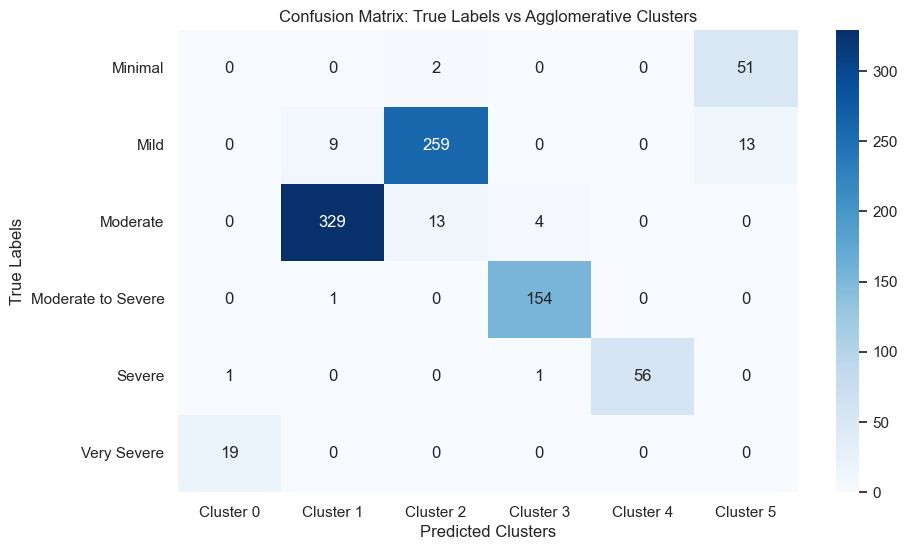

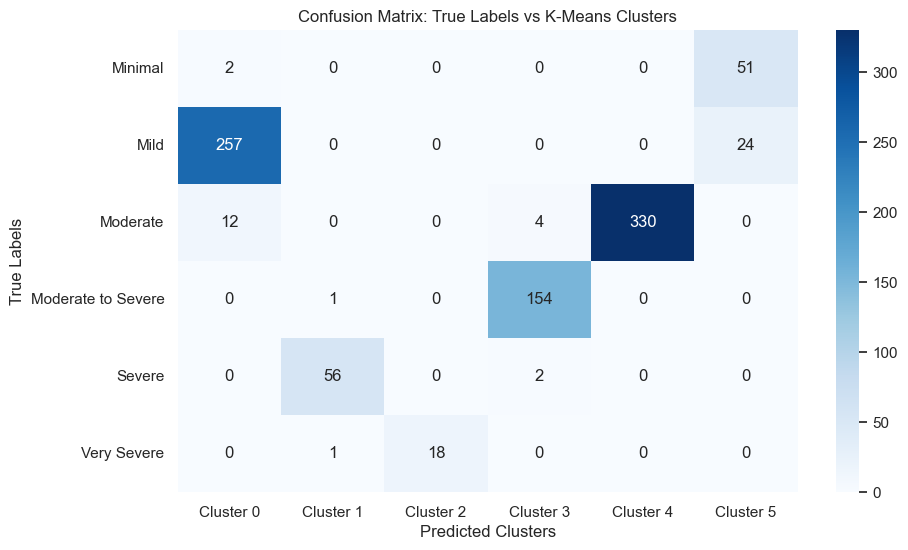

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot the confusion matrix (or overlap between clusters and true labels)
def plot_confusion_matrix(y_true, y_pred, title, true_order, pred_order):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Reorder the confusion matrix according to the true and predicted label orders
    cm_ordered = cm[true_order, :][:, pred_order]

    # Convert confusion matrix into a DataFrame for easier plotting
    cm_df = pd.DataFrame(cm_ordered, 
                         index=le.inverse_transform(np.array(true_order)),  # True labels in specified order
                         columns=[f"Cluster {i}" for i in pred_order])  # Predicted clusters in specified order
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Clusters')
    plt.show()

# Define the correct order of true disease severity labels
true_order = [1, 0, 2, 3, 4, 5]  # Adjust these indices to match the labels in `le`
# Define the correct order for predicted clusters (this can be adjusted based on your analysis)
pred_order = list(range(len(np.unique(agg_clusters))))  # Predicted clusters in their natural order

# Plot confusion matrix for Agglomerative Clustering
plot_confusion_matrix(y, agg_clusters, "Confusion Matrix: True Labels vs Agglomerative Clusters", true_order, pred_order)

# Plot confusion matrix for K-Means Clustering
plot_confusion_matrix(y, kmeans_clusters, "Confusion Matrix: True Labels vs K-Means Clusters", true_order, pred_order)


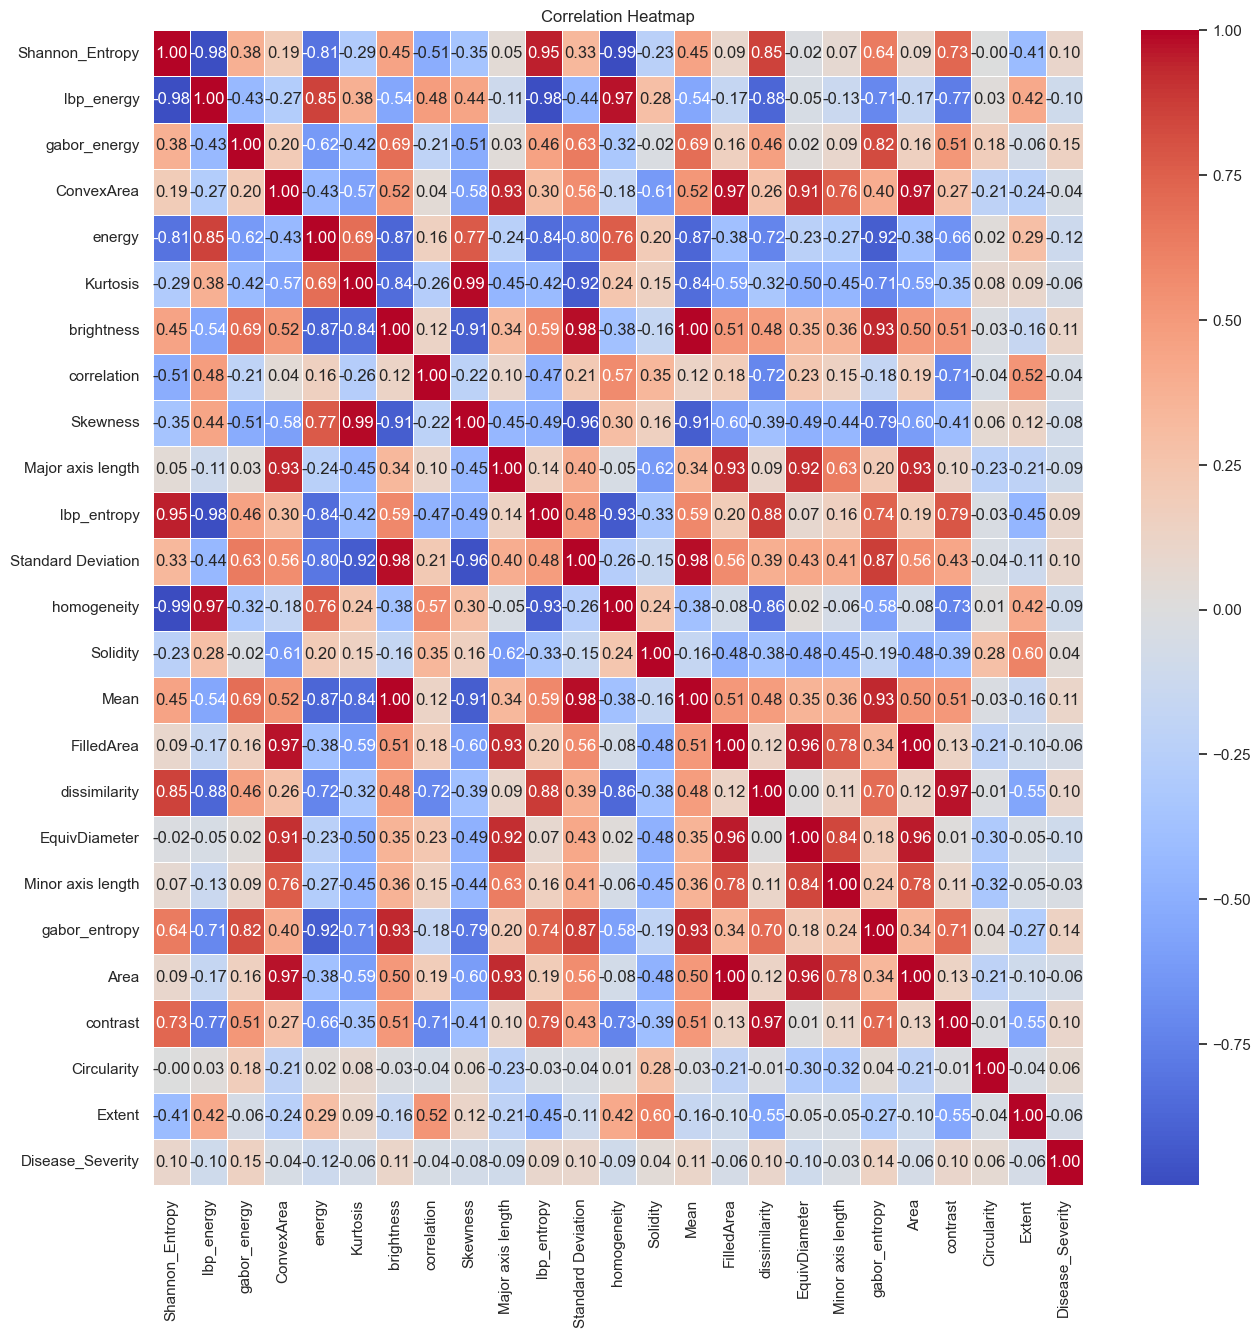

Point Biserial Correlation Results:
                    Correlation   p-value
gabor_energy           0.151001  0.000005
gabor_entropy          0.138877  0.000026
energy                -0.118949  0.000318
brightness             0.105780  0.001379
Mean                   0.105780  0.001379
contrast               0.103980  0.001665
lbp_energy            -0.103074  0.001828
EquivDiameter         -0.103038  0.001835
Shannon_Entropy        0.102745  0.001891
dissimilarity          0.102465  0.001946
Standard Deviation     0.095476  0.003902
Major axis length     -0.094639  0.004229
homogeneity           -0.093655  0.004645
lbp_entropy            0.091149  0.005877
Skewness              -0.079425  0.016436
Kurtosis              -0.063557  0.055025
Extent                -0.062500  0.059201
Circularity            0.062496  0.059215
FilledArea            -0.060154  0.069408
Area                  -0.060075  0.069773
correlation           -0.044642  0.177982
ConvexArea            -0.043407  0.19030

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, f_oneway, chi2_contingency, kendalltau
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and target variable
features_to_test = [
    'Shannon_Entropy', 'lbp_energy', 'gabor_energy', 'ConvexArea', 'energy', 'Kurtosis', 'brightness', 
    'correlation', 'Skewness', 'Major axis length', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 
    'Solidity', 'Mean', 'FilledArea', 'dissimilarity', 'EquivDiameter', 'Minor axis length', 'gabor_entropy', 
    'Area', 'contrast','Circularity','Extent'
]
target_variable = 'Disease_Severity'

# Encode categorical target variable if necessary
label_encoder = LabelEncoder()
data[target_variable] = label_encoder.fit_transform(data[target_variable])

# Calculate correlations
numerical_data = data[features_to_test + [target_variable]]

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Initialize dictionaries to store results
point_biserial_results = {}
anova_results = {}
chi_square_results = {}
kendall_results = {}

# Point Biserial Correlation (for binary target)
for feature in features_to_test:
    if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
        correlation, p_value = pointbiserialr(data[feature], data[target_variable])
        point_biserial_results[feature] = (correlation, p_value)

# Convert results to DataFrame
point_biserial_df = pd.DataFrame.from_dict(point_biserial_results, orient='index', columns=['Correlation', 'p-value'])
point_biserial_df.sort_values(by='p-value', ascending=True, inplace=True)

# ANOVA (for multi-class target)
unique_categories = data[target_variable].unique()
if len(unique_categories) > 2:  # Check if target variable is multi-class
    for feature in features_to_test:
        if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
            groups = [data[data[target_variable] == category][feature] for category in unique_categories]
            f_stat, p_value = f_oneway(*groups)
            anova_results[feature] = (f_stat, p_value)

    # Convert results to DataFrame
    anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
    anova_df.sort_values(by='p-value', ascending=True, inplace=True)
# Kendall's tau correlation (for multi-class target)
for feature in features_to_test:
    if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
        correlation, p_value = kendalltau(data[feature], data[target_variable])
        kendall_results[feature] = (correlation, p_value)

# Convert results to DataFrame
kendall_df = pd.DataFrame.from_dict(kendall_results, orient='index', columns=['Correlation', 'p-value'])
kendall_df.sort_values(by='p-value', ascending=True, inplace=True)



# Chi-Square Test (for categorical features)
categorical_features = ['NP3LGAGL', 'NP2FREZ', 'NP2TURN', 'NP3KTRMR', 'NP3TTAPL', 'NP3SPCH', 'NP3RIGRL', 'NP2HYGN']
for feature in categorical_features:
    if data[feature].dtype == 'object':  # Ensure the feature is categorical
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi_square_results[feature] = p

# Convert results to DataFrame
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['p-value'])
chi_square_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print results
print("Point Biserial Correlation Results:")
print(point_biserial_df)

if len(unique_categories) > 2:
    print("\nANOVA Results:")
    print(anova_df)
# Print results
print("Kendall's Tau Correlation Results:")
print(kendall_df)


print("\nChi-Square Test Results:")
print(chi_square_df)


Pairwise p-values for each feature:
                       V1_V2     V1_V3     V1_V4     V2_V3     V2_V4     V3_V4
Area                0.038717  0.016150  0.253049  0.745365  0.389618  0.237867
Circularity         0.952214  0.130713  0.023384  0.142469  0.025901  0.424600
ConvexArea          0.055100  0.041034  0.353660  0.923949  0.351326  0.299313
EquivDiameter       0.112713  0.078768  0.915993  0.842686  0.176895  0.130022
Extent              0.653066  0.203433  0.755098  0.450128  0.899065  0.378045
FilledArea          0.038375  0.015592  0.251237  0.736107  0.389906  0.233821
Kurtosis            0.000928  0.000041  0.000115  0.317051  0.403772  0.903687
Major axis length   0.122352  0.211860  0.798561  0.760574  0.197620  0.321787
Mean                0.028002  0.000552  0.000439  0.173317  0.135598  0.863607
Minor axis length   0.196964  0.080803  0.651102  0.622649  0.140914  0.064538
Shannon_Entropy     0.420556  0.316263  0.070216  0.766218  0.195034  0.307580
Skewness        

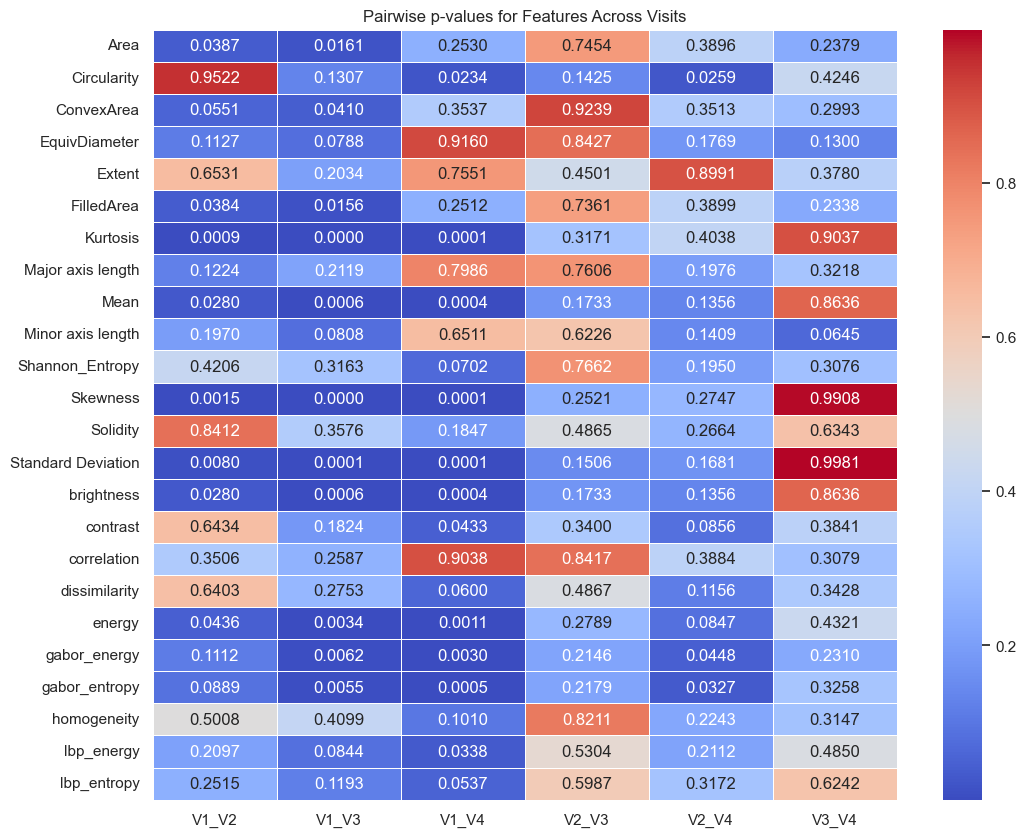

In [45]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and visits
features_to_test = [
    'Shannon_Entropy', 'lbp_energy', 'gabor_energy', 'ConvexArea', 'energy', 'Kurtosis', 'brightness', 
    'correlation', 'Skewness', 'Major axis length', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 
    'Solidity', 'Mean', 'FilledArea', 'dissimilarity', 'EquivDiameter', 'Minor axis length', 'gabor_entropy', 
    'Area', 'contrast','Circularity','Extent'
]
visit_pairs = [('V1', 'V2'), ('V1', 'V3'), ('V1', 'V4'), ('V2', 'V3'), ('V2', 'V4'), ('V3', 'V4')]

# Initialize dictionary to store results
pairwise_p_values = {}

# Iterate over each feature
for feature in features_to_test:
    feature_p_values = {}
    for v1, v2 in visit_pairs:
        # Subset data for each visit
        data_v1 = data[data['Visit'] == v1][feature].dropna()
        data_v2 = data[data['Visit'] == v2][feature].dropna()

        if len(data_v1) > 1 and len(data_v2) > 1:  # Ensure there are enough data points
            # Perform t-test
            t_stat, p_value = ttest_ind(data_v1, data_v2, nan_policy='omit')
            feature_p_values[f"{v1}_{v2}"] = p_value
        else:
            feature_p_values[f"{v1}_{v2}"] = np.nan  # Not enough data for comparison

    # Store results
    pairwise_p_values[feature] = feature_p_values

# Convert results to DataFrame for better readability
pairwise_p_values_df = pd.DataFrame(pairwise_p_values).T
pairwise_p_values_df.sort_index(inplace=True)

# Save results to CSV
pairwise_p_values_df.to_csv("pairwise_p_values.csv")

# Print results
print("Pairwise p-values for each feature:")
print(pairwise_p_values_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame from CSV if needed
# pairwise_p_values_df = pd.read_csv("pairwise_p_values.csv", index_col=0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Pairwise p-values for Features Across Visits")
plt.show()


Pairwise p-values for each feature across disease severity levels:
                    Moderate_Moderate to Severe  Moderate_Severe  \
Area                                   0.894126         0.147071   
Circularity                            0.115275         0.033029   
ConvexArea                             0.904279         0.155583   
EquivDiameter                          0.589417         0.026027   
Extent                                 0.898853         0.115502   
FilledArea                             0.892394         0.144639   
Kurtosis                               0.020130         0.762058   
Major axis length                      0.489064         0.034346   
Mean                                   0.023411         0.205733   
Minor axis length                      0.544902         0.191861   
Shannon_Entropy                        0.610616         0.027688   
Skewness                               0.015241         0.488132   
Solidity                               0.811852  

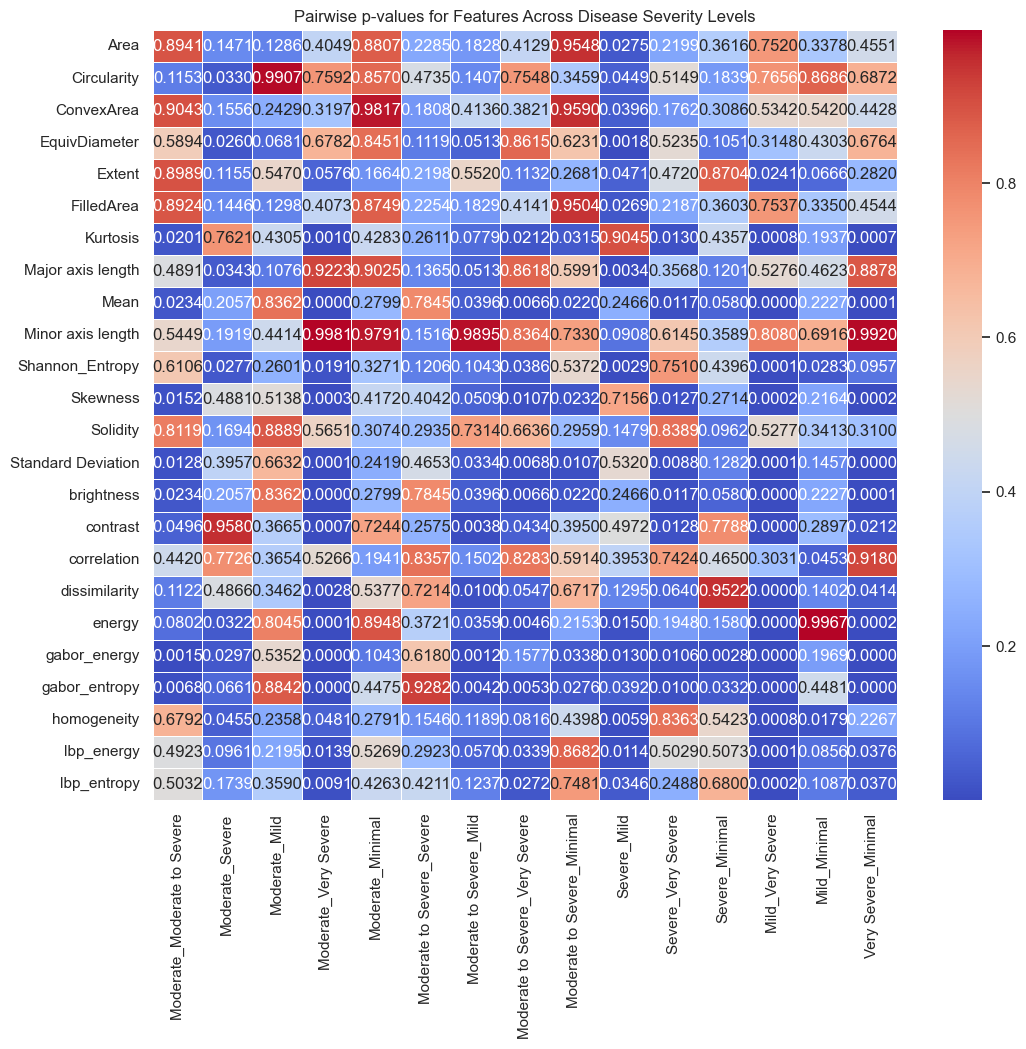

In [46]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features to test
features_to_test = [
   'Shannon_Entropy', 'lbp_energy', 'gabor_energy', 'ConvexArea', 'energy', 'Kurtosis', 'brightness', 
    'correlation', 'Skewness', 'Major axis length', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 
    'Solidity', 'Mean', 'FilledArea', 'dissimilarity', 'EquivDiameter', 'Minor axis length', 'gabor_entropy', 
    'Area', 'contrast','Circularity','Extent'
]

# Identify unique disease severity levels
severity_levels = data['Disease_Severity'].unique()

# Initialize dictionary to store results
pairwise_p_values = {}

# Iterate over each feature
for feature in features_to_test:
    feature_p_values = {}
    for i in range(len(severity_levels)):
        for j in range(i + 1, len(severity_levels)):
            severity_1 = severity_levels[i]
            severity_2 = severity_levels[j]

            # Subset data for each severity level
            data_severity_1 = data[data['Disease_Severity'] == severity_1][feature].dropna()
            data_severity_2 = data[data['Disease_Severity'] == severity_2][feature].dropna()

            if len(data_severity_1) > 1 and len(data_severity_2) > 1:  # Ensure there are enough data points
                # Perform t-test
                t_stat, p_value = ttest_ind(data_severity_1, data_severity_2, nan_policy='omit')
                feature_p_values[f"{severity_1}_{severity_2}"] = p_value
            else:
                feature_p_values[f"{severity_1}_{severity_2}"] = np.nan  # Not enough data for comparison

    # Store results
    pairwise_p_values[feature] = feature_p_values

# Convert results to DataFrame for better readability
pairwise_p_values_df = pd.DataFrame(pairwise_p_values).T
pairwise_p_values_df.sort_index(inplace=True)

# Save results to CSV
pairwise_p_values_df.to_csv("pairwise_p_values_by_severity.csv")

# Print results
print("Pairwise p-values for each feature across disease severity levels:")
print(pairwise_p_values_df)

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Pairwise p-values for Features Across Disease Severity Levels")
plt.show()


In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize LDA with the number of components equal to the number of classes - 1
lda = LinearDiscriminantAnalysis(n_components=2)  # Change n_components based on how many classes you have

# Fit LDA model
lda.fit(X_train, y_train)

# Transform training data to the LDA space
X_train_lda = lda.transform(X_train)

# Transform test data to LDA space
X_test_lda = lda.transform(X_test)

# Get LDA coefficients (scaling values)
lda_coefficients = lda.coef_

# Create a DataFrame to store the coefficients for better visualization
feature_names = X.columns  # Get feature names from your feature dataset
lda_coeff_df = pd.DataFrame(lda_coefficients, columns=feature_names, index=[f'LD{i+1}' for i in range(lda_coefficients.shape[0])])

# Display the coefficients
print(lda_coeff_df)


           Area  Circularity  ConvexArea  EquivDiameter    Extent  FilledArea  \
LD1   -8.252716     0.045757    9.798749      13.958913 -0.579762    6.744372   
LD2  109.519017    -1.045292   26.812530      27.482033 -0.106024 -122.533060   
LD3  -32.376812    -1.137096    0.610291      -2.706795  0.403877   33.790492   
LD4   28.578062     2.336829  -14.663314     -15.297602  1.212147  -27.688841   
LD5 -139.584031     1.527124  -20.631410      -7.253372 -2.071171  135.729558   
LD6  547.315730    -2.315485  -34.325956     -69.119472 -2.896307 -515.389930   

      Kurtosis  Major axis length       Mean  Minor axis length  ...  \
LD1 -22.148055         -12.279496 -25.845194          -9.944929  ...   
LD2  66.632549         -24.119486  -2.273314         -17.045293  ...   
LD3  -7.573635           0.751090  -0.383356           0.435285  ...   
LD4   9.322787          15.642386  18.045865          12.804702  ...   
LD5  44.055967          16.018542  49.503393          10.921573  ...   


Feature Contributions per Disease Group:
                          Area  Circularity  ConvexArea  EquivDiameter  \
Disease_Severity                                                         
Mild                 15.413960    -0.680752   11.812236      12.408416   
Minimal              40.427140    -1.277859   21.006645      21.514571   
Moderate            -40.729533     0.227947   -0.345437       1.346379   
Moderate to Severe   18.962463     0.502557  -11.799632     -13.853260   
Severe               86.566893     0.713959  -22.814825     -28.903199   
Very Severe         528.384964    -1.121326  -31.592238     -57.358456   

                      Extent  FilledArea    Kurtosis  Major axis length  \
Disease_Severity                                                          
Mild               -0.221094  -17.534987   -6.530326         -12.164125   
Minimal            -0.493098  -43.769295   -9.519250         -21.493941   
Moderate            0.315658   39.461325   -6.289870          -0.0

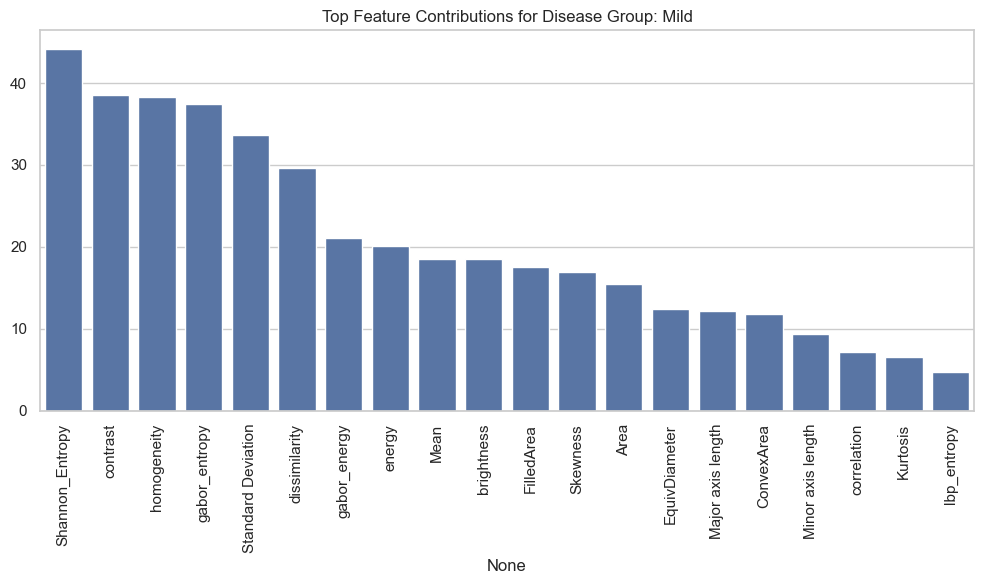

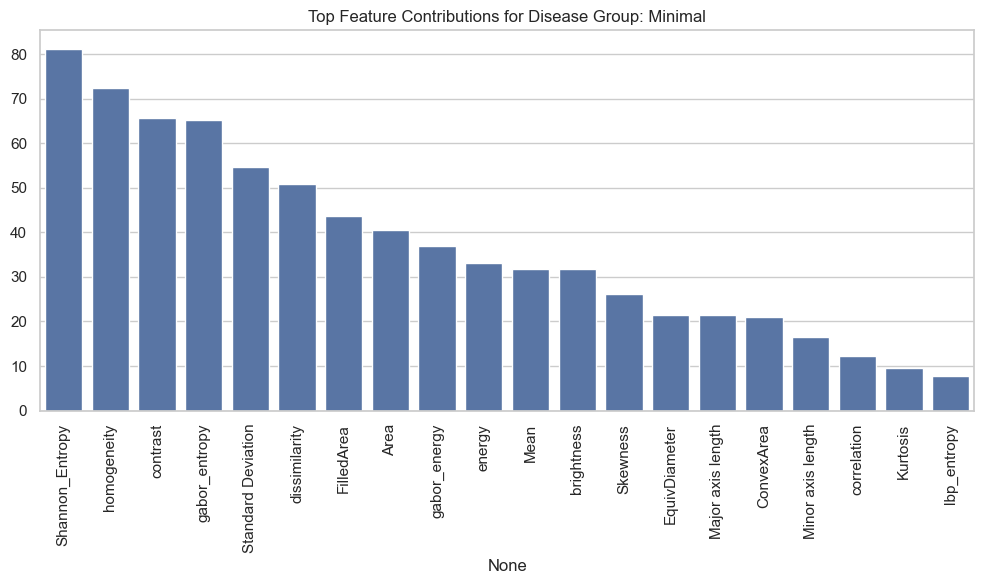

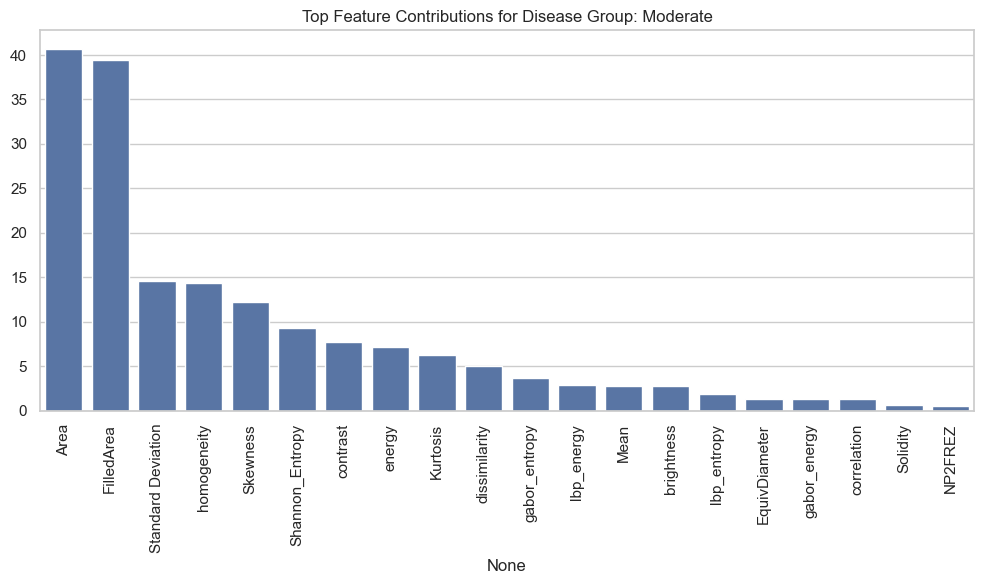

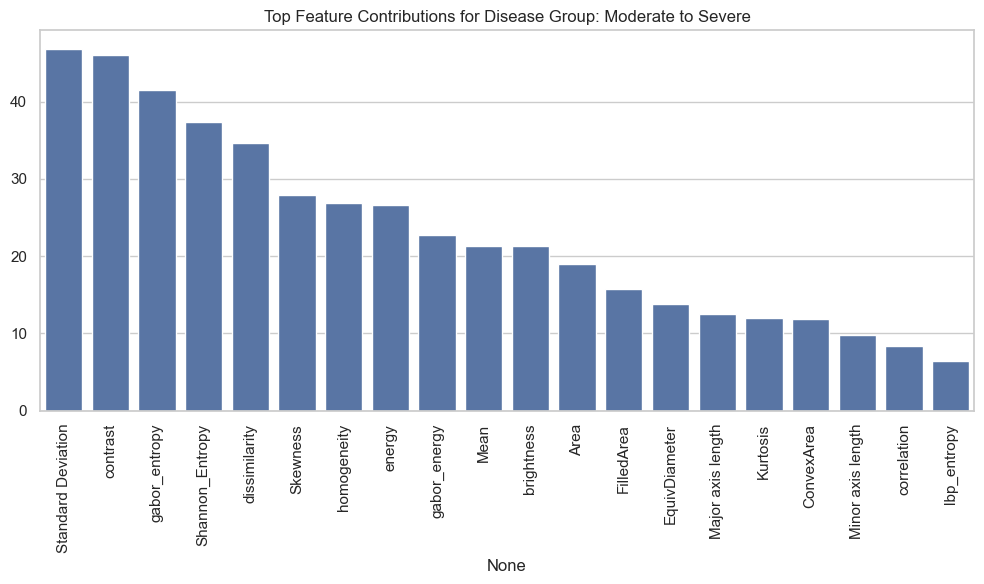

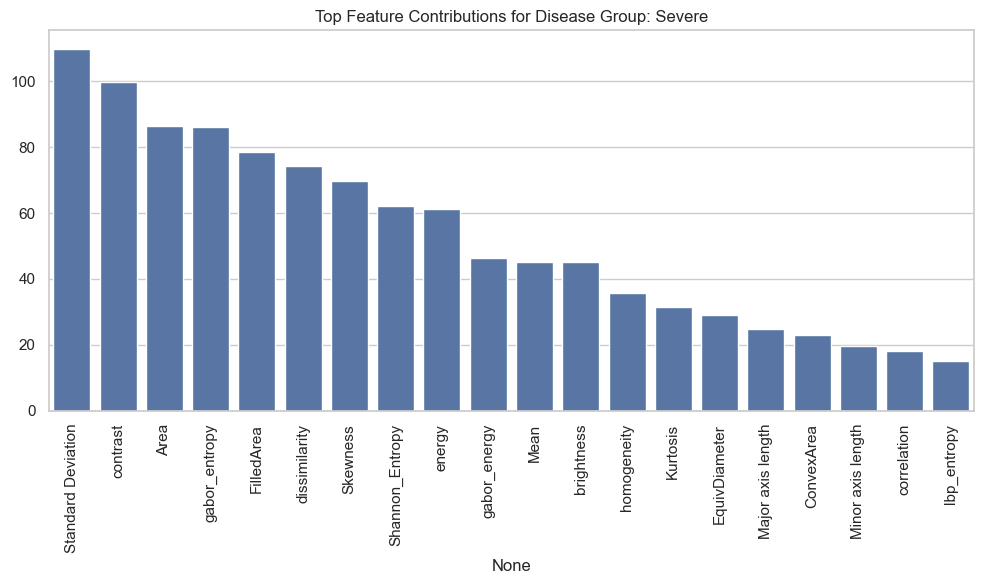

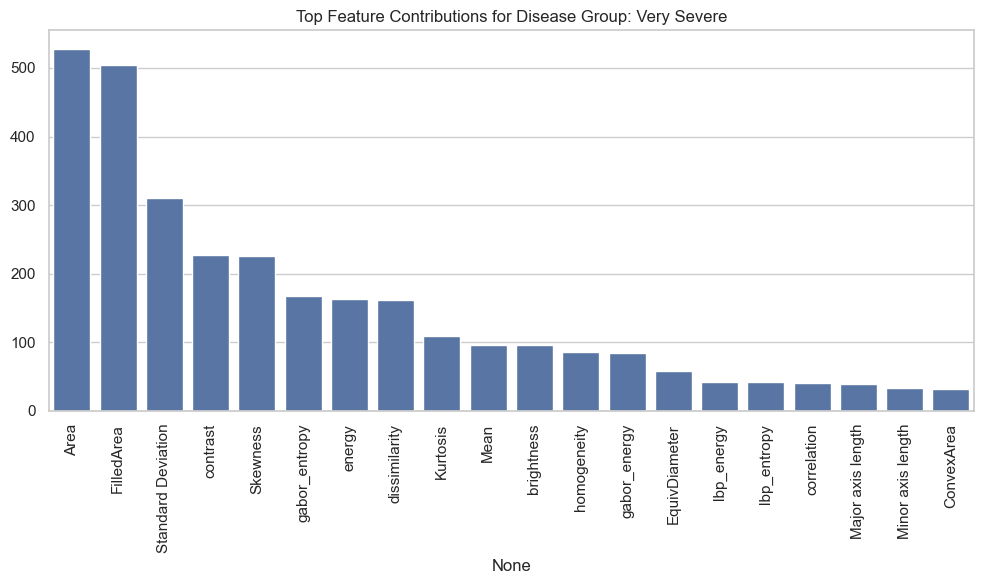

In [48]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (assuming dataset is already loaded earlier)
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the LDA model
lda = LDA(n_components=2)
X_lda_train = lda.fit_transform(X_train, y_train)

# Transform the test set
X_lda_test = lda.transform(X_test)

# Convert y_test back to original labels
y_test_labels = le.inverse_transform(y_test)

# Create a DataFrame for the LDA transformed test set and corresponding disease severity labels
lda_test_df = pd.DataFrame(X_lda_test, columns=['LD1', 'LD2'])
lda_test_df['Disease_Severity'] = y_test_labels

# Compute mean LD values per disease state
lda_means = lda_test_df.groupby('Disease_Severity').mean()

# Back-project mean LD values to original feature space using LDA scalings
def get_feature_contributions(lda_means, lda):
    # Only select the first two components from lda.scalings_ (since we have 2 LDA components)
    lda_scalings = lda.scalings_[:, :2]  # Selecting the first 2 components

    # Back-project from LDA space to the original feature space
    feature_contributions = np.dot(lda_means[['LD1', 'LD2']].values, lda_scalings.T)
    
    # Create a DataFrame for the contributions
    contribution_df = pd.DataFrame(
        feature_contributions, 
        index=lda_means.index, 
        columns=X.columns  # Use the original feature names
    )
    
    return contribution_df

# Calculate feature contributions for each disease group
feature_contributions_per_group = get_feature_contributions(lda_means, lda)

# Display feature contributions for each disease group
print("Feature Contributions per Disease Group:")
print(feature_contributions_per_group)

# Optional: Plot the top features for each disease group
def plot_top_features(contribution_df):
    for disease in contribution_df.index:
        contributions = contribution_df.loc[disease]
        top_features = contributions.abs().sort_values(ascending=False)[:20]  # Top 10 features
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_features.index, y=top_features.values)
        plt.title(f"Top Feature Contributions for Disease Group: {disease}")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Plot top features for each disease group
plot_top_features(feature_contributions_per_group)
